In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Input
from keras import regularizers
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from keras.layers.normalization import BatchNormalization


from IPython import embed


def import_data(dataset="data"):
    X = []
    Y = []

    f=open(dataset, 'r')
    for line in f.readlines():
        intLine = [int(s) for s in line.split(' ')]
        X.append(intLine[:-1])
        Y.append(intLine[-1:])

    return X,Y

def create_dense_model(input_size, width, depth=1):
    model = Sequential()
    
    for _ in range(depth):
        model.add(Dense(int(width), kernel_initializer=keras.initializers.lecun_uniform(seed=None), input_shape=(input_size,)))
        model.add(BatchNormalization())
        model.add(Activation('selu'))
    
    
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), metrics=['binary_crossentropy', 'accuracy'])
    return model

def draw_figure(data, label, fig=None, ax=None):
    # Plot the change in the validation set vs change in the training set
    if not fig:
        fig = plt.figure(figsize=(6, 4))
    if not ax:
        ax = fig.add_subplot(111)
    
    
    real_data = []
    scale = int(len(data[0])/50)
    
    
    
    for i in range(0, 50):
        real_data.append(data[0][i*scale])
    
    ax.plot(np.arange(1, len(data[0]) + 1, scale), real_data, label=label)
    ax.legend(loc='best')
    ax.set_xlabel('Epoch number')
    return fig, ax

Using TensorFlow backend.



Training examples: 80000
Test examples: 20000
Epochs: 1000  -------  Try: 0
Train on 80000 samples, validate on 20000 samples
Epoch 1/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.7000 - binary_crossentropy: 0.7000 - acc: 0.5006 - val_loss: 0.6948 - val_binary_crossentropy: 0.6948 - val_acc: 0.4986
Epoch 2/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6950 - binary_crossentropy: 0.6950 - acc: 0.5045 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_acc: 0.4984
Epoch 3/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6945 - binary_crossentropy: 0.6945 - acc: 0.5050 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_acc: 0.5037
Epoch 4/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6940 - binary_crossentropy: 0.6940 - acc: 0.5035 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_acc: 0.5035
Epoch 5/1000
80000/80000 [==============================] - 4

80000/80000 [==============================] - 4s 53us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - acc: 0.5411 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_acc: 0.5000
Epoch 41/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - acc: 0.5446 - val_loss: 0.6990 - val_binary_crossentropy: 0.6990 - val_acc: 0.5008
Epoch 42/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - acc: 0.5453 - val_loss: 0.7001 - val_binary_crossentropy: 0.7001 - val_acc: 0.4963
Epoch 43/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - acc: 0.5461 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_acc: 0.4985
Epoch 44/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - acc: 0.5455 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_acc: 0

80000/80000 [==============================] - 4s 53us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - acc: 0.5671 - val_loss: 0.7070 - val_binary_crossentropy: 0.7070 - val_acc: 0.4989
Epoch 81/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5695 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_acc: 0.4994
Epoch 82/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - acc: 0.5705 - val_loss: 0.7093 - val_binary_crossentropy: 0.7093 - val_acc: 0.4979
Epoch 83/1000
80000/80000 [==============================] - 4s 54us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - acc: 0.5688 - val_loss: 0.7079 - val_binary_crossentropy: 0.7079 - val_acc: 0.5006
Epoch 84/1000
80000/80000 [==============================] - 5s 56us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - acc: 0.5686 - val_loss: 0.7056 - val_binary_crossentropy: 0.7056 - val_acc: 0

80000/80000 [==============================] - 4s 54us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - acc: 0.5806 - val_loss: 0.7142 - val_binary_crossentropy: 0.7142 - val_acc: 0.5051
Epoch 121/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - acc: 0.5804 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_acc: 0.5022
Epoch 122/1000
80000/80000 [==============================] - 4s 52us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - acc: 0.5812 - val_loss: 0.7130 - val_binary_crossentropy: 0.7130 - val_acc: 0.5023
Epoch 123/1000
80000/80000 [==============================] - 4s 52us/step - loss: 0.6715 - binary_crossentropy: 0.6715 - acc: 0.5825 - val_loss: 0.7166 - val_binary_crossentropy: 0.7166 - val_acc: 0.5009
Epoch 124/1000
80000/80000 [==============================] - 4s 54us/step - loss: 0.6714 - binary_crossentropy: 0.6714 - acc: 0.5829 - val_loss: 0.7150 - val_binary_crossentropy: 0.7150 - val_ac

80000/80000 [==============================] - 4s 49us/step - loss: 0.6663 - binary_crossentropy: 0.6663 - acc: 0.5926 - val_loss: 0.7228 - val_binary_crossentropy: 0.7228 - val_acc: 0.5007
Epoch 161/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6672 - binary_crossentropy: 0.6672 - acc: 0.5895 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.5052
Epoch 162/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6660 - binary_crossentropy: 0.6660 - acc: 0.5915 - val_loss: 0.7201 - val_binary_crossentropy: 0.7201 - val_acc: 0.5004
Epoch 163/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - acc: 0.5937 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.5004
Epoch 164/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6665 - binary_crossentropy: 0.6665 - acc: 0.5912 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_ac

80000/80000 [==============================] - 3s 41us/step - loss: 0.6629 - binary_crossentropy: 0.6629 - acc: 0.5988 - val_loss: 0.7247 - val_binary_crossentropy: 0.7247 - val_acc: 0.5002
Epoch 201/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6621 - binary_crossentropy: 0.6621 - acc: 0.5991 - val_loss: 0.7240 - val_binary_crossentropy: 0.7240 - val_acc: 0.5018
Epoch 202/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6624 - binary_crossentropy: 0.6624 - acc: 0.5973 - val_loss: 0.7245 - val_binary_crossentropy: 0.7245 - val_acc: 0.5031
Epoch 203/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6614 - binary_crossentropy: 0.6614 - acc: 0.6013 - val_loss: 0.7251 - val_binary_crossentropy: 0.7251 - val_acc: 0.5040
Epoch 204/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6620 - binary_crossentropy: 0.6620 - acc: 0.6002 - val_loss: 0.7228 - val_binary_crossentropy: 0.7228 - val_ac

80000/80000 [==============================] - 3s 41us/step - loss: 0.6588 - binary_crossentropy: 0.6588 - acc: 0.6058 - val_loss: 0.7310 - val_binary_crossentropy: 0.7310 - val_acc: 0.5025
Epoch 241/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6597 - binary_crossentropy: 0.6597 - acc: 0.6025 - val_loss: 0.7281 - val_binary_crossentropy: 0.7281 - val_acc: 0.5014
Epoch 242/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6589 - binary_crossentropy: 0.6589 - acc: 0.6024 - val_loss: 0.7281 - val_binary_crossentropy: 0.7281 - val_acc: 0.5033
Epoch 243/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6593 - binary_crossentropy: 0.6593 - acc: 0.6024 - val_loss: 0.7283 - val_binary_crossentropy: 0.7283 - val_acc: 0.5033
Epoch 244/1000
80000/80000 [==============================] - 3s 44us/step - loss: 0.6588 - binary_crossentropy: 0.6588 - acc: 0.6037 - val_loss: 0.7262 - val_binary_crossentropy: 0.7262 - val_ac

80000/80000 [==============================] - 3s 40us/step - loss: 0.6566 - binary_crossentropy: 0.6566 - acc: 0.6078 - val_loss: 0.7300 - val_binary_crossentropy: 0.7300 - val_acc: 0.5049
Epoch 281/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6568 - binary_crossentropy: 0.6568 - acc: 0.6063 - val_loss: 0.7294 - val_binary_crossentropy: 0.7294 - val_acc: 0.5021
Epoch 282/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6570 - binary_crossentropy: 0.6570 - acc: 0.6065 - val_loss: 0.7288 - val_binary_crossentropy: 0.7288 - val_acc: 0.5063
Epoch 283/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6565 - binary_crossentropy: 0.6565 - acc: 0.6070 - val_loss: 0.7315 - val_binary_crossentropy: 0.7315 - val_acc: 0.5032
Epoch 284/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6563 - binary_crossentropy: 0.6563 - acc: 0.6077 - val_loss: 0.7325 - val_binary_crossentropy: 0.7325 - val_ac

80000/80000 [==============================] - 3s 40us/step - loss: 0.6542 - binary_crossentropy: 0.6542 - acc: 0.6119 - val_loss: 0.7313 - val_binary_crossentropy: 0.7313 - val_acc: 0.5033
Epoch 321/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6545 - binary_crossentropy: 0.6545 - acc: 0.6105 - val_loss: 0.7324 - val_binary_crossentropy: 0.7324 - val_acc: 0.5022
Epoch 322/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6546 - binary_crossentropy: 0.6546 - acc: 0.6118 - val_loss: 0.7307 - val_binary_crossentropy: 0.7307 - val_acc: 0.5023
Epoch 323/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6545 - binary_crossentropy: 0.6545 - acc: 0.6111 - val_loss: 0.7320 - val_binary_crossentropy: 0.7320 - val_acc: 0.5045
Epoch 324/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6548 - binary_crossentropy: 0.6548 - acc: 0.6095 - val_loss: 0.7315 - val_binary_crossentropy: 0.7315 - val_ac

80000/80000 [==============================] - 3s 40us/step - loss: 0.6526 - binary_crossentropy: 0.6526 - acc: 0.6133 - val_loss: 0.7343 - val_binary_crossentropy: 0.7343 - val_acc: 0.5024
Epoch 361/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6524 - binary_crossentropy: 0.6524 - acc: 0.6138 - val_loss: 0.7341 - val_binary_crossentropy: 0.7341 - val_acc: 0.5024
Epoch 362/1000
80000/80000 [==============================] - 3s 39us/step - loss: 0.6520 - binary_crossentropy: 0.6520 - acc: 0.6146 - val_loss: 0.7325 - val_binary_crossentropy: 0.7325 - val_acc: 0.5029
Epoch 363/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6534 - binary_crossentropy: 0.6534 - acc: 0.6128 - val_loss: 0.7337 - val_binary_crossentropy: 0.7337 - val_acc: 0.5010
Epoch 364/1000
80000/80000 [==============================] - 3s 39us/step - loss: 0.6535 - binary_crossentropy: 0.6535 - acc: 0.6111 - val_loss: 0.7347 - val_binary_crossentropy: 0.7347 - val_ac

80000/80000 [==============================] - 4s 46us/step - loss: 0.6510 - binary_crossentropy: 0.6510 - acc: 0.6159 - val_loss: 0.7346 - val_binary_crossentropy: 0.7346 - val_acc: 0.5069
Epoch 401/1000
80000/80000 [==============================] - 4s 44us/step - loss: 0.6518 - binary_crossentropy: 0.6518 - acc: 0.6127 - val_loss: 0.7345 - val_binary_crossentropy: 0.7345 - val_acc: 0.5022
Epoch 402/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.6517 - binary_crossentropy: 0.6517 - acc: 0.6136 - val_loss: 0.7351 - val_binary_crossentropy: 0.7351 - val_acc: 0.5041
Epoch 403/1000
80000/80000 [==============================] - 4s 51us/step - loss: 0.6513 - binary_crossentropy: 0.6513 - acc: 0.6135 - val_loss: 0.7358 - val_binary_crossentropy: 0.7358 - val_acc: 0.5031
Epoch 404/1000
80000/80000 [==============================] - 3s 42us/step - loss: 0.6516 - binary_crossentropy: 0.6516 - acc: 0.6142 - val_loss: 0.7367 - val_binary_crossentropy: 0.7367 - val_ac

80000/80000 [==============================] - 5s 62us/step - loss: 0.6503 - binary_crossentropy: 0.6503 - acc: 0.6164 - val_loss: 0.7386 - val_binary_crossentropy: 0.7386 - val_acc: 0.5012
Epoch 441/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6496 - binary_crossentropy: 0.6496 - acc: 0.6169 - val_loss: 0.7399 - val_binary_crossentropy: 0.7399 - val_acc: 0.5023
Epoch 442/1000
80000/80000 [==============================] - 4s 47us/step - loss: 0.6506 - binary_crossentropy: 0.6506 - acc: 0.6166 - val_loss: 0.7356 - val_binary_crossentropy: 0.7356 - val_acc: 0.5048
Epoch 443/1000
80000/80000 [==============================] - 3s 44us/step - loss: 0.6500 - binary_crossentropy: 0.6500 - acc: 0.6165 - val_loss: 0.7390 - val_binary_crossentropy: 0.7390 - val_acc: 0.5007
Epoch 444/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6498 - binary_crossentropy: 0.6498 - acc: 0.6164 - val_loss: 0.7382 - val_binary_crossentropy: 0.7382 - val_ac

80000/80000 [==============================] - 4s 47us/step - loss: 0.6487 - binary_crossentropy: 0.6487 - acc: 0.6172 - val_loss: 0.7391 - val_binary_crossentropy: 0.7391 - val_acc: 0.5028
Epoch 481/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6488 - binary_crossentropy: 0.6488 - acc: 0.6165 - val_loss: 0.7396 - val_binary_crossentropy: 0.7396 - val_acc: 0.5034
Epoch 482/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6488 - binary_crossentropy: 0.6488 - acc: 0.6172 - val_loss: 0.7390 - val_binary_crossentropy: 0.7390 - val_acc: 0.5044
Epoch 483/1000
80000/80000 [==============================] - 4s 51us/step - loss: 0.6496 - binary_crossentropy: 0.6496 - acc: 0.6178 - val_loss: 0.7400 - val_binary_crossentropy: 0.7400 - val_acc: 0.5006
Epoch 484/1000
80000/80000 [==============================] - 5s 60us/step - loss: 0.6488 - binary_crossentropy: 0.6488 - acc: 0.6186 - val_loss: 0.7386 - val_binary_crossentropy: 0.7386 - val_ac

80000/80000 [==============================] - 3s 41us/step - loss: 0.6473 - binary_crossentropy: 0.6473 - acc: 0.6197 - val_loss: 0.7439 - val_binary_crossentropy: 0.7439 - val_acc: 0.4987
Epoch 521/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6479 - binary_crossentropy: 0.6479 - acc: 0.6199 - val_loss: 0.7424 - val_binary_crossentropy: 0.7424 - val_acc: 0.5005
Epoch 522/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6480 - binary_crossentropy: 0.6480 - acc: 0.6204 - val_loss: 0.7405 - val_binary_crossentropy: 0.7405 - val_acc: 0.5025
Epoch 523/1000
80000/80000 [==============================] - 3s 43us/step - loss: 0.6486 - binary_crossentropy: 0.6486 - acc: 0.6184 - val_loss: 0.7388 - val_binary_crossentropy: 0.7388 - val_acc: 0.5027
Epoch 524/1000
80000/80000 [==============================] - 3s 42us/step - loss: 0.6481 - binary_crossentropy: 0.6481 - acc: 0.6183 - val_loss: 0.7413 - val_binary_crossentropy: 0.7413 - val_ac

80000/80000 [==============================] - 3s 42us/step - loss: 0.6468 - binary_crossentropy: 0.6468 - acc: 0.6214 - val_loss: 0.7419 - val_binary_crossentropy: 0.7419 - val_acc: 0.4988
Epoch 561/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6472 - binary_crossentropy: 0.6472 - acc: 0.6213 - val_loss: 0.7430 - val_binary_crossentropy: 0.7430 - val_acc: 0.5022
Epoch 562/1000
80000/80000 [==============================] - 4s 44us/step - loss: 0.6468 - binary_crossentropy: 0.6468 - acc: 0.6205 - val_loss: 0.7434 - val_binary_crossentropy: 0.7434 - val_acc: 0.5024
Epoch 563/1000
80000/80000 [==============================] - 3s 43us/step - loss: 0.6476 - binary_crossentropy: 0.6476 - acc: 0.6203 - val_loss: 0.7427 - val_binary_crossentropy: 0.7427 - val_acc: 0.5016
Epoch 564/1000
80000/80000 [==============================] - 3s 42us/step - loss: 0.6462 - binary_crossentropy: 0.6462 - acc: 0.6212 - val_loss: 0.7425 - val_binary_crossentropy: 0.7425 - val_ac

80000/80000 [==============================] - 4s 44us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - acc: 0.6216 - val_loss: 0.7403 - val_binary_crossentropy: 0.7403 - val_acc: 0.5034
Epoch 601/1000
80000/80000 [==============================] - 4s 45us/step - loss: 0.6470 - binary_crossentropy: 0.6470 - acc: 0.6197 - val_loss: 0.7415 - val_binary_crossentropy: 0.7415 - val_acc: 0.5003
Epoch 602/1000
80000/80000 [==============================] - 4s 48us/step - loss: 0.6453 - binary_crossentropy: 0.6453 - acc: 0.6219 - val_loss: 0.7441 - val_binary_crossentropy: 0.7441 - val_acc: 0.4992
Epoch 603/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6463 - binary_crossentropy: 0.6463 - acc: 0.6225 - val_loss: 0.7427 - val_binary_crossentropy: 0.7427 - val_acc: 0.5003
Epoch 604/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - acc: 0.6214 - val_loss: 0.7426 - val_binary_crossentropy: 0.7426 - val_ac

80000/80000 [==============================] - 3s 40us/step - loss: 0.6456 - binary_crossentropy: 0.6456 - acc: 0.6221 - val_loss: 0.7449 - val_binary_crossentropy: 0.7449 - val_acc: 0.5004
Epoch 641/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6452 - binary_crossentropy: 0.6452 - acc: 0.6240 - val_loss: 0.7470 - val_binary_crossentropy: 0.7470 - val_acc: 0.4998
Epoch 642/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6456 - binary_crossentropy: 0.6456 - acc: 0.6228 - val_loss: 0.7458 - val_binary_crossentropy: 0.7458 - val_acc: 0.4987
Epoch 643/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6445 - binary_crossentropy: 0.6445 - acc: 0.6240 - val_loss: 0.7458 - val_binary_crossentropy: 0.7458 - val_acc: 0.4956
Epoch 644/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6450 - binary_crossentropy: 0.6450 - acc: 0.6238 - val_loss: 0.7476 - val_binary_crossentropy: 0.7476 - val_ac

80000/80000 [==============================] - 3s 41us/step - loss: 0.6450 - binary_crossentropy: 0.6450 - acc: 0.6233 - val_loss: 0.7447 - val_binary_crossentropy: 0.7447 - val_acc: 0.5018
Epoch 681/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6446 - binary_crossentropy: 0.6446 - acc: 0.6251 - val_loss: 0.7462 - val_binary_crossentropy: 0.7462 - val_acc: 0.4997
Epoch 682/1000
80000/80000 [==============================] - 4s 50us/step - loss: 0.6446 - binary_crossentropy: 0.6446 - acc: 0.6226 - val_loss: 0.7446 - val_binary_crossentropy: 0.7446 - val_acc: 0.5020
Epoch 683/1000
80000/80000 [==============================] - 4s 52us/step - loss: 0.6444 - binary_crossentropy: 0.6444 - acc: 0.6238 - val_loss: 0.7466 - val_binary_crossentropy: 0.7466 - val_acc: 0.5004
Epoch 684/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.6451 - binary_crossentropy: 0.6451 - acc: 0.6247 - val_loss: 0.7432 - val_binary_crossentropy: 0.7432 - val_ac

80000/80000 [==============================] - 4s 46us/step - loss: 0.6449 - binary_crossentropy: 0.6449 - acc: 0.6256 - val_loss: 0.7461 - val_binary_crossentropy: 0.7461 - val_acc: 0.5011
Epoch 721/1000
80000/80000 [==============================] - 3s 40us/step - loss: 0.6450 - binary_crossentropy: 0.6450 - acc: 0.6248 - val_loss: 0.7465 - val_binary_crossentropy: 0.7465 - val_acc: 0.4999
Epoch 722/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6447 - binary_crossentropy: 0.6447 - acc: 0.6251 - val_loss: 0.7465 - val_binary_crossentropy: 0.7465 - val_acc: 0.5017
Epoch 723/1000
80000/80000 [==============================] - 3s 42us/step - loss: 0.6439 - binary_crossentropy: 0.6439 - acc: 0.6257 - val_loss: 0.7475 - val_binary_crossentropy: 0.7475 - val_acc: 0.5024
Epoch 724/1000
80000/80000 [==============================] - 3s 42us/step - loss: 0.6447 - binary_crossentropy: 0.6447 - acc: 0.6232 - val_loss: 0.7466 - val_binary_crossentropy: 0.7466 - val_ac

80000/80000 [==============================] - 3s 41us/step - loss: 0.6432 - binary_crossentropy: 0.6432 - acc: 0.6258 - val_loss: 0.7476 - val_binary_crossentropy: 0.7476 - val_acc: 0.4995
Epoch 761/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6443 - binary_crossentropy: 0.6443 - acc: 0.6255 - val_loss: 0.7472 - val_binary_crossentropy: 0.7472 - val_acc: 0.4986
Epoch 762/1000
80000/80000 [==============================] - 3s 41us/step - loss: 0.6436 - binary_crossentropy: 0.6436 - acc: 0.6244 - val_loss: 0.7488 - val_binary_crossentropy: 0.7488 - val_acc: 0.4984
Epoch 763/1000
80000/80000 [==============================] - 4s 44us/step - loss: 0.6435 - binary_crossentropy: 0.6435 - acc: 0.6250 - val_loss: 0.7497 - val_binary_crossentropy: 0.7497 - val_acc: 0.4954
Epoch 764/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6446 - binary_crossentropy: 0.6446 - acc: 0.6232 - val_loss: 0.7468 - val_binary_crossentropy: 0.7468 - val_ac

80000/80000 [==============================] - 4s 49us/step - loss: 0.6431 - binary_crossentropy: 0.6431 - acc: 0.6257 - val_loss: 0.7477 - val_binary_crossentropy: 0.7477 - val_acc: 0.5022
Epoch 801/1000
80000/80000 [==============================] - 4s 48us/step - loss: 0.6429 - binary_crossentropy: 0.6429 - acc: 0.6248 - val_loss: 0.7506 - val_binary_crossentropy: 0.7506 - val_acc: 0.4986
Epoch 802/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6432 - binary_crossentropy: 0.6432 - acc: 0.6266 - val_loss: 0.7476 - val_binary_crossentropy: 0.7476 - val_acc: 0.5000
Epoch 803/1000
80000/80000 [==============================] - 4s 47us/step - loss: 0.6440 - binary_crossentropy: 0.6440 - acc: 0.6243 - val_loss: 0.7468 - val_binary_crossentropy: 0.7468 - val_acc: 0.4988
Epoch 804/1000
80000/80000 [==============================] - 4s 48us/step - loss: 0.6436 - binary_crossentropy: 0.6436 - acc: 0.6265 - val_loss: 0.7461 - val_binary_crossentropy: 0.7461 - val_ac

80000/80000 [==============================] - 4s 53us/step - loss: 0.6424 - binary_crossentropy: 0.6424 - acc: 0.6259 - val_loss: 0.7496 - val_binary_crossentropy: 0.7496 - val_acc: 0.4967
Epoch 841/1000
80000/80000 [==============================] - 4s 55us/step - loss: 0.6431 - binary_crossentropy: 0.6431 - acc: 0.6245 - val_loss: 0.7495 - val_binary_crossentropy: 0.7495 - val_acc: 0.4967
Epoch 842/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6431 - binary_crossentropy: 0.6431 - acc: 0.6269 - val_loss: 0.7495 - val_binary_crossentropy: 0.7495 - val_acc: 0.4984
Epoch 843/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.6431 - binary_crossentropy: 0.6431 - acc: 0.6252 - val_loss: 0.7483 - val_binary_crossentropy: 0.7483 - val_acc: 0.4989
Epoch 844/1000
80000/80000 [==============================] - 4s 52us/step - loss: 0.6422 - binary_crossentropy: 0.6422 - acc: 0.6272 - val_loss: 0.7491 - val_binary_crossentropy: 0.7491 - val_ac

80000/80000 [==============================] - 4s 48us/step - loss: 0.6423 - binary_crossentropy: 0.6423 - acc: 0.6272 - val_loss: 0.7518 - val_binary_crossentropy: 0.7518 - val_acc: 0.4978
Epoch 881/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6429 - binary_crossentropy: 0.6429 - acc: 0.6245 - val_loss: 0.7518 - val_binary_crossentropy: 0.7518 - val_acc: 0.5005
Epoch 882/1000
80000/80000 [==============================] - 4s 48us/step - loss: 0.6426 - binary_crossentropy: 0.6426 - acc: 0.6264 - val_loss: 0.7492 - val_binary_crossentropy: 0.7492 - val_acc: 0.5004
Epoch 883/1000
80000/80000 [==============================] - 4s 47us/step - loss: 0.6425 - binary_crossentropy: 0.6425 - acc: 0.6268 - val_loss: 0.7501 - val_binary_crossentropy: 0.7501 - val_acc: 0.4967
Epoch 884/1000
80000/80000 [==============================] - 4s 53us/step - loss: 0.6433 - binary_crossentropy: 0.6433 - acc: 0.6259 - val_loss: 0.7500 - val_binary_crossentropy: 0.7500 - val_ac

80000/80000 [==============================] - 4s 51us/step - loss: 0.6420 - binary_crossentropy: 0.6420 - acc: 0.6273 - val_loss: 0.7476 - val_binary_crossentropy: 0.7476 - val_acc: 0.5015
Epoch 921/1000
80000/80000 [==============================] - 4s 51us/step - loss: 0.6419 - binary_crossentropy: 0.6419 - acc: 0.6271 - val_loss: 0.7503 - val_binary_crossentropy: 0.7503 - val_acc: 0.4993
Epoch 922/1000
80000/80000 [==============================] - 4s 51us/step - loss: 0.6418 - binary_crossentropy: 0.6418 - acc: 0.6285 - val_loss: 0.7515 - val_binary_crossentropy: 0.7515 - val_acc: 0.4974
Epoch 923/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6425 - binary_crossentropy: 0.6425 - acc: 0.6278 - val_loss: 0.7504 - val_binary_crossentropy: 0.7504 - val_acc: 0.5028
Epoch 924/1000
80000/80000 [==============================] - 4s 50us/step - loss: 0.6415 - binary_crossentropy: 0.6415 - acc: 0.6286 - val_loss: 0.7509 - val_binary_crossentropy: 0.7509 - val_ac

80000/80000 [==============================] - 4s 51us/step - loss: 0.6417 - binary_crossentropy: 0.6417 - acc: 0.6274 - val_loss: 0.7508 - val_binary_crossentropy: 0.7508 - val_acc: 0.5008
Epoch 961/1000
80000/80000 [==============================] - 4s 50us/step - loss: 0.6419 - binary_crossentropy: 0.6419 - acc: 0.6298 - val_loss: 0.7504 - val_binary_crossentropy: 0.7504 - val_acc: 0.4994
Epoch 962/1000
80000/80000 [==============================] - 4s 50us/step - loss: 0.6411 - binary_crossentropy: 0.6411 - acc: 0.6287 - val_loss: 0.7499 - val_binary_crossentropy: 0.7499 - val_acc: 0.4994
Epoch 963/1000
80000/80000 [==============================] - 4s 49us/step - loss: 0.6413 - binary_crossentropy: 0.6413 - acc: 0.6286 - val_loss: 0.7504 - val_binary_crossentropy: 0.7504 - val_acc: 0.4982
Epoch 964/1000
80000/80000 [==============================] - 4s 48us/step - loss: 0.6423 - binary_crossentropy: 0.6423 - acc: 0.6271 - val_loss: 0.7508 - val_binary_crossentropy: 0.7508 - val_ac

20000/20000 [==============================] - 0s 18us/step


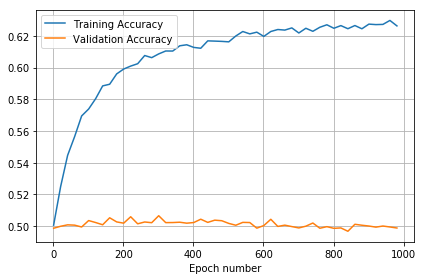

[[5300 5341]
 [4682 4677]]

Validation Avg: [ 0.49885]
Train Avg: [ 0.628975]


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]    [0]
[0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1]    [0]
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1]    [1]
[1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1]    [1]
[0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]    [1]
[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1]    [0]
[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0]    [0]
[0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0]    [1]
[0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1]    [0]
[0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0]    [0]
[0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0]    [1]




 Overall for: 30_1000
[ 0.49885]
[ 0.628975]

OVERALL VAL: 0.498849997073
OVERALL TRAIN: 0.628975001201


Epochs: 1000  -------  Try: 0
Train on 80000 sample

80000/80000 [==============================] - 6s 71us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - acc: 0.5484 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_acc: 0.5019
Epoch 37/1000
80000/80000 [==============================] - 6s 76us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - acc: 0.5507 - val_loss: 0.6997 - val_binary_crossentropy: 0.6997 - val_acc: 0.5026
Epoch 38/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - acc: 0.5499 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_acc: 0.5040
Epoch 39/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - acc: 0.5537 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.5006
Epoch 40/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - acc: 0.5561 - val_loss: 0.7050 - val_binary_crossentropy: 0.7050 - val_acc: 0

80000/80000 [==============================] - 7s 89us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - acc: 0.5940 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_acc: 0.5010
Epoch 77/1000
80000/80000 [==============================] - 7s 82us/step - loss: 0.6653 - binary_crossentropy: 0.6653 - acc: 0.5941 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.5022
Epoch 78/1000
80000/80000 [==============================] - 6s 81us/step - loss: 0.6649 - binary_crossentropy: 0.6649 - acc: 0.5938 - val_loss: 0.7198 - val_binary_crossentropy: 0.7198 - val_acc: 0.5033
Epoch 79/1000
80000/80000 [==============================] - 6s 80us/step - loss: 0.6640 - binary_crossentropy: 0.6640 - acc: 0.5959 - val_loss: 0.7212 - val_binary_crossentropy: 0.7212 - val_acc: 0.5015
Epoch 80/1000
80000/80000 [==============================] - 7s 87us/step - loss: 0.6640 - binary_crossentropy: 0.6640 - acc: 0.5951 - val_loss: 0.7203 - val_binary_crossentropy: 0.7203 - val_acc: 0

80000/80000 [==============================] - 6s 69us/step - loss: 0.6432 - binary_crossentropy: 0.6432 - acc: 0.6268 - val_loss: 0.7434 - val_binary_crossentropy: 0.7434 - val_acc: 0.4976
Epoch 117/1000
80000/80000 [==============================] - 6s 69us/step - loss: 0.6430 - binary_crossentropy: 0.6430 - acc: 0.6262 - val_loss: 0.7441 - val_binary_crossentropy: 0.7441 - val_acc: 0.5010
Epoch 118/1000
80000/80000 [==============================] - 6s 71us/step - loss: 0.6422 - binary_crossentropy: 0.6422 - acc: 0.6282 - val_loss: 0.7473 - val_binary_crossentropy: 0.7473 - val_acc: 0.5014
Epoch 119/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.6416 - binary_crossentropy: 0.6416 - acc: 0.6290 - val_loss: 0.7434 - val_binary_crossentropy: 0.7434 - val_acc: 0.5047
Epoch 120/1000
80000/80000 [==============================] - 7s 83us/step - loss: 0.6414 - binary_crossentropy: 0.6414 - acc: 0.6290 - val_loss: 0.7453 - val_binary_crossentropy: 0.7453 - val_ac

80000/80000 [==============================] - 5s 67us/step - loss: 0.6231 - binary_crossentropy: 0.6231 - acc: 0.6496 - val_loss: 0.7693 - val_binary_crossentropy: 0.7693 - val_acc: 0.5036
Epoch 157/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.6232 - binary_crossentropy: 0.6232 - acc: 0.6530 - val_loss: 0.7664 - val_binary_crossentropy: 0.7664 - val_acc: 0.5007
Epoch 158/1000
80000/80000 [==============================] - 5s 63us/step - loss: 0.6220 - binary_crossentropy: 0.6220 - acc: 0.6506 - val_loss: 0.7669 - val_binary_crossentropy: 0.7669 - val_acc: 0.5040
Epoch 159/1000
80000/80000 [==============================] - 5s 66us/step - loss: 0.6218 - binary_crossentropy: 0.6218 - acc: 0.6511 - val_loss: 0.7660 - val_binary_crossentropy: 0.7660 - val_acc: 0.5035
Epoch 160/1000
80000/80000 [==============================] - 5s 61us/step - loss: 0.6215 - binary_crossentropy: 0.6215 - acc: 0.6534 - val_loss: 0.7724 - val_binary_crossentropy: 0.7724 - val_ac

80000/80000 [==============================] - 5s 67us/step - loss: 0.6071 - binary_crossentropy: 0.6071 - acc: 0.6668 - val_loss: 0.7913 - val_binary_crossentropy: 0.7913 - val_acc: 0.5079
Epoch 197/1000
80000/80000 [==============================] - 5s 66us/step - loss: 0.6060 - binary_crossentropy: 0.6060 - acc: 0.6664 - val_loss: 0.7849 - val_binary_crossentropy: 0.7849 - val_acc: 0.5012
Epoch 198/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.6056 - binary_crossentropy: 0.6056 - acc: 0.6682 - val_loss: 0.7931 - val_binary_crossentropy: 0.7931 - val_acc: 0.5041
Epoch 199/1000
80000/80000 [==============================] - 5s 66us/step - loss: 0.6061 - binary_crossentropy: 0.6061 - acc: 0.6684 - val_loss: 0.7932 - val_binary_crossentropy: 0.7932 - val_acc: 0.5016
Epoch 200/1000
80000/80000 [==============================] - 6s 79us/step - loss: 0.6055 - binary_crossentropy: 0.6055 - acc: 0.6690 - val_loss: 0.7854 - val_binary_crossentropy: 0.7854 - val_ac

80000/80000 [==============================] - 5s 67us/step - loss: 0.5927 - binary_crossentropy: 0.5927 - acc: 0.6810 - val_loss: 0.8133 - val_binary_crossentropy: 0.8133 - val_acc: 0.5022
Epoch 237/1000
80000/80000 [==============================] - 5s 67us/step - loss: 0.5923 - binary_crossentropy: 0.5923 - acc: 0.6808 - val_loss: 0.8086 - val_binary_crossentropy: 0.8086 - val_acc: 0.5048
Epoch 238/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5933 - binary_crossentropy: 0.5933 - acc: 0.6801 - val_loss: 0.8015 - val_binary_crossentropy: 0.8015 - val_acc: 0.5049
Epoch 239/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5930 - binary_crossentropy: 0.5930 - acc: 0.6811 - val_loss: 0.8085 - val_binary_crossentropy: 0.8085 - val_acc: 0.5036
Epoch 240/1000
80000/80000 [==============================] - 5s 62us/step - loss: 0.5907 - binary_crossentropy: 0.5907 - acc: 0.6834 - val_loss: 0.8086 - val_binary_crossentropy: 0.8086 - val_ac

80000/80000 [==============================] - 5s 61us/step - loss: 0.5834 - binary_crossentropy: 0.5834 - acc: 0.6891 - val_loss: 0.8180 - val_binary_crossentropy: 0.8180 - val_acc: 0.5035
Epoch 277/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5824 - binary_crossentropy: 0.5824 - acc: 0.6907 - val_loss: 0.8120 - val_binary_crossentropy: 0.8120 - val_acc: 0.5042
Epoch 278/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5818 - binary_crossentropy: 0.5818 - acc: 0.6913 - val_loss: 0.8200 - val_binary_crossentropy: 0.8200 - val_acc: 0.5041
Epoch 279/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5817 - binary_crossentropy: 0.5817 - acc: 0.6907 - val_loss: 0.8217 - val_binary_crossentropy: 0.8217 - val_acc: 0.5070
Epoch 280/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5814 - binary_crossentropy: 0.5814 - acc: 0.6915 - val_loss: 0.8164 - val_binary_crossentropy: 0.8164 - val_ac

80000/80000 [==============================] - 5s 62us/step - loss: 0.5738 - binary_crossentropy: 0.5738 - acc: 0.6980 - val_loss: 0.8336 - val_binary_crossentropy: 0.8336 - val_acc: 0.5047
Epoch 317/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5723 - binary_crossentropy: 0.5723 - acc: 0.6981 - val_loss: 0.8375 - val_binary_crossentropy: 0.8375 - val_acc: 0.5049
Epoch 318/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5727 - binary_crossentropy: 0.5727 - acc: 0.6983 - val_loss: 0.8354 - val_binary_crossentropy: 0.8354 - val_acc: 0.5044
Epoch 319/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5727 - binary_crossentropy: 0.5727 - acc: 0.6989 - val_loss: 0.8344 - val_binary_crossentropy: 0.8344 - val_acc: 0.5020
Epoch 320/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5724 - binary_crossentropy: 0.5724 - acc: 0.6989 - val_loss: 0.8339 - val_binary_crossentropy: 0.8339 - val_ac

80000/80000 [==============================] - 5s 59us/step - loss: 0.5672 - binary_crossentropy: 0.5672 - acc: 0.7026 - val_loss: 0.8413 - val_binary_crossentropy: 0.8413 - val_acc: 0.5027
Epoch 357/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5673 - binary_crossentropy: 0.5673 - acc: 0.7014 - val_loss: 0.8349 - val_binary_crossentropy: 0.8349 - val_acc: 0.5067
Epoch 358/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5658 - binary_crossentropy: 0.5658 - acc: 0.7047 - val_loss: 0.8439 - val_binary_crossentropy: 0.8439 - val_acc: 0.5019
Epoch 359/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5671 - binary_crossentropy: 0.5671 - acc: 0.7039 - val_loss: 0.8380 - val_binary_crossentropy: 0.8380 - val_acc: 0.5025
Epoch 360/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5651 - binary_crossentropy: 0.5651 - acc: 0.7049 - val_loss: 0.8454 - val_binary_crossentropy: 0.8454 - val_ac

80000/80000 [==============================] - 5s 58us/step - loss: 0.5612 - binary_crossentropy: 0.5612 - acc: 0.7064 - val_loss: 0.8521 - val_binary_crossentropy: 0.8521 - val_acc: 0.5032
Epoch 397/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5615 - binary_crossentropy: 0.5615 - acc: 0.7078 - val_loss: 0.8525 - val_binary_crossentropy: 0.8525 - val_acc: 0.5055
Epoch 398/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5603 - binary_crossentropy: 0.5603 - acc: 0.7089 - val_loss: 0.8514 - val_binary_crossentropy: 0.8514 - val_acc: 0.5042
Epoch 399/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5598 - binary_crossentropy: 0.5598 - acc: 0.7091 - val_loss: 0.8507 - val_binary_crossentropy: 0.8507 - val_acc: 0.5009
Epoch 400/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5590 - binary_crossentropy: 0.5590 - acc: 0.7089 - val_loss: 0.8519 - val_binary_crossentropy: 0.8519 - val_ac

80000/80000 [==============================] - 5s 58us/step - loss: 0.5554 - binary_crossentropy: 0.5554 - acc: 0.7116 - val_loss: 0.8583 - val_binary_crossentropy: 0.8583 - val_acc: 0.5032
Epoch 437/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5569 - binary_crossentropy: 0.5569 - acc: 0.7095 - val_loss: 0.8596 - val_binary_crossentropy: 0.8596 - val_acc: 0.5021
Epoch 438/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5567 - binary_crossentropy: 0.5567 - acc: 0.7117 - val_loss: 0.8567 - val_binary_crossentropy: 0.8567 - val_acc: 0.5018
Epoch 439/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5549 - binary_crossentropy: 0.5549 - acc: 0.7145 - val_loss: 0.8617 - val_binary_crossentropy: 0.8617 - val_acc: 0.5048
Epoch 440/1000
80000/80000 [==============================] - 5s 58us/step - loss: 0.5561 - binary_crossentropy: 0.5561 - acc: 0.7114 - val_loss: 0.8549 - val_binary_crossentropy: 0.8549 - val_ac

80000/80000 [==============================] - 5s 58us/step - loss: 0.5522 - binary_crossentropy: 0.5522 - acc: 0.7147 - val_loss: 0.8666 - val_binary_crossentropy: 0.8666 - val_acc: 0.5083
Epoch 477/1000
80000/80000 [==============================] - 5s 61us/step - loss: 0.5513 - binary_crossentropy: 0.5513 - acc: 0.7173 - val_loss: 0.8632 - val_binary_crossentropy: 0.8632 - val_acc: 0.5078
Epoch 478/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5516 - binary_crossentropy: 0.5516 - acc: 0.7160 - val_loss: 0.8655 - val_binary_crossentropy: 0.8655 - val_acc: 0.5028
Epoch 479/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5515 - binary_crossentropy: 0.5515 - acc: 0.7150 - val_loss: 0.8668 - val_binary_crossentropy: 0.8668 - val_acc: 0.5066
Epoch 480/1000
80000/80000 [==============================] - 6s 74us/step - loss: 0.5528 - binary_crossentropy: 0.5528 - acc: 0.7131 - val_loss: 0.8644 - val_binary_crossentropy: 0.8644 - val_ac

80000/80000 [==============================] - 5s 68us/step - loss: 0.5472 - binary_crossentropy: 0.5472 - acc: 0.7185 - val_loss: 0.8736 - val_binary_crossentropy: 0.8736 - val_acc: 0.5014
Epoch 517/1000
80000/80000 [==============================] - 7s 89us/step - loss: 0.5483 - binary_crossentropy: 0.5483 - acc: 0.7174 - val_loss: 0.8753 - val_binary_crossentropy: 0.8753 - val_acc: 0.5020
Epoch 518/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5481 - binary_crossentropy: 0.5481 - acc: 0.7173 - val_loss: 0.8744 - val_binary_crossentropy: 0.8744 - val_acc: 0.5055
Epoch 519/1000
80000/80000 [==============================] - 6s 71us/step - loss: 0.5466 - binary_crossentropy: 0.5466 - acc: 0.7186 - val_loss: 0.8735 - val_binary_crossentropy: 0.8735 - val_acc: 0.5021
Epoch 520/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5484 - binary_crossentropy: 0.5484 - acc: 0.7179 - val_loss: 0.8720 - val_binary_crossentropy: 0.8720 - val_ac

80000/80000 [==============================] - 6s 70us/step - loss: 0.5434 - binary_crossentropy: 0.5434 - acc: 0.7228 - val_loss: 0.8772 - val_binary_crossentropy: 0.8772 - val_acc: 0.5007
Epoch 557/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5436 - binary_crossentropy: 0.5436 - acc: 0.7213 - val_loss: 0.8844 - val_binary_crossentropy: 0.8844 - val_acc: 0.5025
Epoch 558/1000
80000/80000 [==============================] - 5s 69us/step - loss: 0.5451 - binary_crossentropy: 0.5451 - acc: 0.7198 - val_loss: 0.8771 - val_binary_crossentropy: 0.8771 - val_acc: 0.5053
Epoch 559/1000
80000/80000 [==============================] - 6s 71us/step - loss: 0.5452 - binary_crossentropy: 0.5452 - acc: 0.7199 - val_loss: 0.8765 - val_binary_crossentropy: 0.8765 - val_acc: 0.5040
Epoch 560/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5438 - binary_crossentropy: 0.5438 - acc: 0.7192 - val_loss: 0.8785 - val_binary_crossentropy: 0.8785 - val_ac

80000/80000 [==============================] - 5s 61us/step - loss: 0.5432 - binary_crossentropy: 0.5432 - acc: 0.7214 - val_loss: 0.8770 - val_binary_crossentropy: 0.8770 - val_acc: 0.5018
Epoch 597/1000
80000/80000 [==============================] - 5s 60us/step - loss: 0.5420 - binary_crossentropy: 0.5420 - acc: 0.7218 - val_loss: 0.8824 - val_binary_crossentropy: 0.8824 - val_acc: 0.5025
Epoch 598/1000
80000/80000 [==============================] - 5s 68us/step - loss: 0.5416 - binary_crossentropy: 0.5416 - acc: 0.7233 - val_loss: 0.8839 - val_binary_crossentropy: 0.8839 - val_acc: 0.5032
Epoch 599/1000
80000/80000 [==============================] - 8s 99us/step - loss: 0.5414 - binary_crossentropy: 0.5414 - acc: 0.7230 - val_loss: 0.8809 - val_binary_crossentropy: 0.8809 - val_acc: 0.5018
Epoch 600/1000
80000/80000 [==============================] - 15s 182us/step - loss: 0.5416 - binary_crossentropy: 0.5416 - acc: 0.7227 - val_loss: 0.8807 - val_binary_crossentropy: 0.8807 - val_

80000/80000 [==============================] - 5s 63us/step - loss: 0.5392 - binary_crossentropy: 0.5392 - acc: 0.7248 - val_loss: 0.8830 - val_binary_crossentropy: 0.8830 - val_acc: 0.5038
Epoch 637/1000
80000/80000 [==============================] - 6s 69us/step - loss: 0.5385 - binary_crossentropy: 0.5385 - acc: 0.7248 - val_loss: 0.8816 - val_binary_crossentropy: 0.8816 - val_acc: 0.5040
Epoch 638/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5399 - binary_crossentropy: 0.5399 - acc: 0.7228 - val_loss: 0.8852 - val_binary_crossentropy: 0.8852 - val_acc: 0.5029
Epoch 639/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.5390 - binary_crossentropy: 0.5390 - acc: 0.7243 - val_loss: 0.8840 - val_binary_crossentropy: 0.8840 - val_acc: 0.5039
Epoch 640/1000
80000/80000 [==============================] - 5s 63us/step - loss: 0.5416 - binary_crossentropy: 0.5416 - acc: 0.7237 - val_loss: 0.8878 - val_binary_crossentropy: 0.8878 - val_ac

80000/80000 [==============================] - 6s 70us/step - loss: 0.5373 - binary_crossentropy: 0.5373 - acc: 0.7241 - val_loss: 0.8919 - val_binary_crossentropy: 0.8919 - val_acc: 0.5005
Epoch 677/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5367 - binary_crossentropy: 0.5367 - acc: 0.7255 - val_loss: 0.8902 - val_binary_crossentropy: 0.8902 - val_acc: 0.5042
Epoch 678/1000
80000/80000 [==============================] - 5s 63us/step - loss: 0.5362 - binary_crossentropy: 0.5362 - acc: 0.7261 - val_loss: 0.8917 - val_binary_crossentropy: 0.8917 - val_acc: 0.5036
Epoch 679/1000
80000/80000 [==============================] - 6s 72us/step - loss: 0.5358 - binary_crossentropy: 0.5358 - acc: 0.7261 - val_loss: 0.8938 - val_binary_crossentropy: 0.8938 - val_acc: 0.5026
Epoch 680/1000
80000/80000 [==============================] - 6s 72us/step - loss: 0.5358 - binary_crossentropy: 0.5358 - acc: 0.7272 - val_loss: 0.8986 - val_binary_crossentropy: 0.8986 - val_ac

80000/80000 [==============================] - 5s 63us/step - loss: 0.5347 - binary_crossentropy: 0.5347 - acc: 0.7277 - val_loss: 0.8926 - val_binary_crossentropy: 0.8926 - val_acc: 0.5040
Epoch 717/1000
80000/80000 [==============================] - 5s 63us/step - loss: 0.5353 - binary_crossentropy: 0.5353 - acc: 0.7275 - val_loss: 0.8927 - val_binary_crossentropy: 0.8927 - val_acc: 0.5050
Epoch 718/1000
80000/80000 [==============================] - 5s 63us/step - loss: 0.5368 - binary_crossentropy: 0.5368 - acc: 0.7279 - val_loss: 0.8932 - val_binary_crossentropy: 0.8932 - val_acc: 0.5038
Epoch 719/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5353 - binary_crossentropy: 0.5353 - acc: 0.7288 - val_loss: 0.8950 - val_binary_crossentropy: 0.8950 - val_acc: 0.5048
Epoch 720/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.5336 - binary_crossentropy: 0.5336 - acc: 0.7299 - val_loss: 0.8943 - val_binary_crossentropy: 0.8943 - val_ac

80000/80000 [==============================] - 5s 66us/step - loss: 0.5316 - binary_crossentropy: 0.5316 - acc: 0.7314 - val_loss: 0.8971 - val_binary_crossentropy: 0.8971 - val_acc: 0.5043
Epoch 757/1000
80000/80000 [==============================] - 6s 69us/step - loss: 0.5342 - binary_crossentropy: 0.5342 - acc: 0.7279 - val_loss: 0.9001 - val_binary_crossentropy: 0.9001 - val_acc: 0.5045
Epoch 758/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.5327 - binary_crossentropy: 0.5327 - acc: 0.7305 - val_loss: 0.8960 - val_binary_crossentropy: 0.8960 - val_acc: 0.5034
Epoch 759/1000
80000/80000 [==============================] - 7s 87us/step - loss: 0.5330 - binary_crossentropy: 0.5330 - acc: 0.7294 - val_loss: 0.8947 - val_binary_crossentropy: 0.8947 - val_acc: 0.5042
Epoch 760/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5319 - binary_crossentropy: 0.5319 - acc: 0.7310 - val_loss: 0.8981 - val_binary_crossentropy: 0.8981 - val_ac

80000/80000 [==============================] - 5s 64us/step - loss: 0.5313 - binary_crossentropy: 0.5313 - acc: 0.7300 - val_loss: 0.9011 - val_binary_crossentropy: 0.9011 - val_acc: 0.5037
Epoch 797/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5321 - binary_crossentropy: 0.5321 - acc: 0.7303 - val_loss: 0.8998 - val_binary_crossentropy: 0.8998 - val_acc: 0.5016
Epoch 798/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5337 - binary_crossentropy: 0.5337 - acc: 0.7287 - val_loss: 0.8989 - val_binary_crossentropy: 0.8989 - val_acc: 0.5011
Epoch 799/1000
80000/80000 [==============================] - 7s 85us/step - loss: 0.5316 - binary_crossentropy: 0.5316 - acc: 0.7294 - val_loss: 0.9013 - val_binary_crossentropy: 0.9013 - val_acc: 0.5009
Epoch 800/1000
80000/80000 [==============================] - 6s 74us/step - loss: 0.5311 - binary_crossentropy: 0.5311 - acc: 0.7316 - val_loss: 0.8969 - val_binary_crossentropy: 0.8969 - val_ac

80000/80000 [==============================] - 6s 69us/step - loss: 0.5287 - binary_crossentropy: 0.5287 - acc: 0.7327 - val_loss: 0.9040 - val_binary_crossentropy: 0.9040 - val_acc: 0.5035
Epoch 837/1000
80000/80000 [==============================] - 6s 71us/step - loss: 0.5318 - binary_crossentropy: 0.5318 - acc: 0.7310 - val_loss: 0.9032 - val_binary_crossentropy: 0.9032 - val_acc: 0.5027
Epoch 838/1000
80000/80000 [==============================] - 6s 69us/step - loss: 0.5311 - binary_crossentropy: 0.5311 - acc: 0.7317 - val_loss: 0.9066 - val_binary_crossentropy: 0.9066 - val_acc: 0.5041
Epoch 839/1000
80000/80000 [==============================] - 5s 69us/step - loss: 0.5292 - binary_crossentropy: 0.5292 - acc: 0.7330 - val_loss: 0.9056 - val_binary_crossentropy: 0.9056 - val_acc: 0.5018
Epoch 840/1000
80000/80000 [==============================] - 6s 71us/step - loss: 0.5313 - binary_crossentropy: 0.5313 - acc: 0.7313 - val_loss: 0.9075 - val_binary_crossentropy: 0.9075 - val_ac

80000/80000 [==============================] - 5s 63us/step - loss: 0.5292 - binary_crossentropy: 0.5292 - acc: 0.7331 - val_loss: 0.9039 - val_binary_crossentropy: 0.9039 - val_acc: 0.5037
Epoch 877/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.5298 - binary_crossentropy: 0.5298 - acc: 0.7320 - val_loss: 0.9087 - val_binary_crossentropy: 0.9087 - val_acc: 0.5036
Epoch 878/1000
80000/80000 [==============================] - 5s 64us/step - loss: 0.5278 - binary_crossentropy: 0.5278 - acc: 0.7341 - val_loss: 0.9082 - val_binary_crossentropy: 0.9082 - val_acc: 0.5033
Epoch 879/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5273 - binary_crossentropy: 0.5273 - acc: 0.7334 - val_loss: 0.9066 - val_binary_crossentropy: 0.9066 - val_acc: 0.5034
Epoch 880/1000
80000/80000 [==============================] - 5s 65us/step - loss: 0.5285 - binary_crossentropy: 0.5285 - acc: 0.7347 - val_loss: 0.9064 - val_binary_crossentropy: 0.9064 - val_ac

80000/80000 [==============================] - 5s 59us/step - loss: 0.5269 - binary_crossentropy: 0.5269 - acc: 0.7339 - val_loss: 0.9118 - val_binary_crossentropy: 0.9118 - val_acc: 0.5042
Epoch 917/1000
80000/80000 [==============================] - 5s 59us/step - loss: 0.5279 - binary_crossentropy: 0.5279 - acc: 0.7324 - val_loss: 0.9120 - val_binary_crossentropy: 0.9120 - val_acc: 0.5021
Epoch 918/1000
80000/80000 [==============================] - 5s 62us/step - loss: 0.5266 - binary_crossentropy: 0.5266 - acc: 0.7338 - val_loss: 0.9099 - val_binary_crossentropy: 0.9099 - val_acc: 0.5051
Epoch 919/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5271 - binary_crossentropy: 0.5271 - acc: 0.7335 - val_loss: 0.9045 - val_binary_crossentropy: 0.9045 - val_acc: 0.5016
Epoch 920/1000
80000/80000 [==============================] - 5s 68us/step - loss: 0.5279 - binary_crossentropy: 0.5279 - acc: 0.7335 - val_loss: 0.9119 - val_binary_crossentropy: 0.9119 - val_ac

80000/80000 [==============================] - 6s 79us/step - loss: 0.5280 - binary_crossentropy: 0.5280 - acc: 0.7344 - val_loss: 0.9074 - val_binary_crossentropy: 0.9074 - val_acc: 0.5022
Epoch 957/1000
80000/80000 [==============================] - 7s 91us/step - loss: 0.5263 - binary_crossentropy: 0.5263 - acc: 0.7338 - val_loss: 0.9063 - val_binary_crossentropy: 0.9063 - val_acc: 0.5000
Epoch 958/1000
80000/80000 [==============================] - 7s 83us/step - loss: 0.5254 - binary_crossentropy: 0.5254 - acc: 0.7357 - val_loss: 0.9117 - val_binary_crossentropy: 0.9117 - val_acc: 0.5012
Epoch 959/1000
80000/80000 [==============================] - 5s 69us/step - loss: 0.5262 - binary_crossentropy: 0.5262 - acc: 0.7336 - val_loss: 0.9136 - val_binary_crossentropy: 0.9136 - val_acc: 0.5011
Epoch 960/1000
80000/80000 [==============================] - 5s 69us/step - loss: 0.5252 - binary_crossentropy: 0.5252 - acc: 0.7348 - val_loss: 0.9152 - val_binary_crossentropy: 0.9152 - val_ac

80000/80000 [==============================] - 6s 70us/step - loss: 0.5248 - binary_crossentropy: 0.5248 - acc: 0.7344 - val_loss: 0.9132 - val_binary_crossentropy: 0.9132 - val_acc: 0.5039
Epoch 997/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5264 - binary_crossentropy: 0.5264 - acc: 0.7380 - val_loss: 0.9139 - val_binary_crossentropy: 0.9139 - val_acc: 0.5043
Epoch 998/1000
80000/80000 [==============================] - 6s 70us/step - loss: 0.5261 - binary_crossentropy: 0.5261 - acc: 0.7340 - val_loss: 0.9176 - val_binary_crossentropy: 0.9176 - val_acc: 0.5020
Epoch 999/1000
80000/80000 [==============================] - 6s 73us/step - loss: 0.5227 - binary_crossentropy: 0.5227 - acc: 0.7360 - val_loss: 0.9170 - val_binary_crossentropy: 0.9170 - val_acc: 0.5014
Epoch 1000/1000
20000/20000 [==============================] - 1s 29us/step


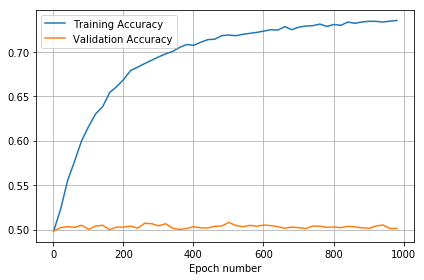

[[4934 4940]
 [5048 5078]]

Validation Avg: [ 0.5006]
Train Avg: [ 0.73625]


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]    [0]
[1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0]    [1]
[0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]    [1]
[0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]    [1]
[1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0]    [0]
[1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0]    [0]
[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1]    [0]
[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0]    [0]
[0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0]    [1]
[1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1]    [0]
[1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0]    [0]




 Overall for: 30_1000
[ 0.5006]
[ 0.73625]

OVERALL VAL: 0.500599996001
OVERALL TRAIN: 0.73625


Epochs: 1000  -------  Try: 0
Train on 80000 samples, validate

80000/80000 [==============================] - 9s 109us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5525 - val_loss: 0.7031 - val_binary_crossentropy: 0.7031 - val_acc: 0.5007
Epoch 37/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - acc: 0.5550 - val_loss: 0.7027 - val_binary_crossentropy: 0.7027 - val_acc: 0.5024
Epoch 38/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - acc: 0.5581 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.5068
Epoch 39/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - acc: 0.5590 - val_loss: 0.7065 - val_binary_crossentropy: 0.7065 - val_acc: 0.5038
Epoch 40/1000
80000/80000 [==============================] - 9s 111us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - acc: 0.5632 - val_loss: 0.7062 - val_binary_crossentropy: 0.7062 - val_a

80000/80000 [==============================] - 9s 111us/step - loss: 0.6490 - binary_crossentropy: 0.6490 - acc: 0.6178 - val_loss: 0.7424 - val_binary_crossentropy: 0.7424 - val_acc: 0.4955
Epoch 77/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.6473 - binary_crossentropy: 0.6473 - acc: 0.6208 - val_loss: 0.7402 - val_binary_crossentropy: 0.7402 - val_acc: 0.4980
Epoch 78/1000
80000/80000 [==============================] - 9s 110us/step - loss: 0.6469 - binary_crossentropy: 0.6469 - acc: 0.6233 - val_loss: 0.7437 - val_binary_crossentropy: 0.7437 - val_acc: 0.5007
Epoch 79/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.6455 - binary_crossentropy: 0.6455 - acc: 0.6239 - val_loss: 0.7425 - val_binary_crossentropy: 0.7425 - val_acc: 0.4986
Epoch 80/1000
80000/80000 [==============================] - 9s 110us/step - loss: 0.6443 - binary_crossentropy: 0.6443 - acc: 0.6248 - val_loss: 0.7476 - val_binary_crossentropy: 0.7476 - val_a

Epoch 116/1000
80000/80000 [==============================] - 9s 118us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.6730 - val_loss: 0.7996 - val_binary_crossentropy: 0.7996 - val_acc: 0.4966
Epoch 117/1000
80000/80000 [==============================] - 9s 112us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6765 - val_loss: 0.8004 - val_binary_crossentropy: 0.8004 - val_acc: 0.4970
Epoch 118/1000
80000/80000 [==============================] - 9s 110us/step - loss: 0.5986 - binary_crossentropy: 0.5986 - acc: 0.6766 - val_loss: 0.8163 - val_binary_crossentropy: 0.8163 - val_acc: 0.4953
Epoch 119/1000
80000/80000 [==============================] - 9s 110us/step - loss: 0.5966 - binary_crossentropy: 0.5966 - acc: 0.6783 - val_loss: 0.7983 - val_binary_crossentropy: 0.7983 - val_acc: 0.4955
Epoch 120/1000
80000/80000 [==============================] - 9s 111us/step - loss: 0.5949 - binary_crossentropy: 0.5949 - acc: 0.6789 - val_loss: 0.8079 - val_binary_crossentr

Epoch 156/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.5552 - binary_crossentropy: 0.5552 - acc: 0.7141 - val_loss: 0.8585 - val_binary_crossentropy: 0.8585 - val_acc: 0.4950
Epoch 157/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.5533 - binary_crossentropy: 0.5533 - acc: 0.7150 - val_loss: 0.8629 - val_binary_crossentropy: 0.8629 - val_acc: 0.4947
Epoch 158/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.5499 - binary_crossentropy: 0.5499 - acc: 0.7176 - val_loss: 0.8791 - val_binary_crossentropy: 0.8791 - val_acc: 0.5012
Epoch 159/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.5491 - binary_crossentropy: 0.5491 - acc: 0.7175 - val_loss: 0.8808 - val_binary_crossentropy: 0.8808 - val_acc: 0.4991
Epoch 160/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.5484 - binary_crossentropy: 0.5484 - acc: 0.7186 - val_loss: 0.8807 - val_binary_crossentr

Epoch 196/1000
80000/80000 [==============================] - 10s 129us/step - loss: 0.5157 - binary_crossentropy: 0.5157 - acc: 0.7435 - val_loss: 0.9300 - val_binary_crossentropy: 0.9300 - val_acc: 0.4963
Epoch 197/1000
80000/80000 [==============================] - 10s 128us/step - loss: 0.5139 - binary_crossentropy: 0.5139 - acc: 0.7452 - val_loss: 0.9353 - val_binary_crossentropy: 0.9353 - val_acc: 0.4968
Epoch 198/1000
80000/80000 [==============================] - 10s 129us/step - loss: 0.5138 - binary_crossentropy: 0.5138 - acc: 0.7451 - val_loss: 0.9363 - val_binary_crossentropy: 0.9363 - val_acc: 0.4980
Epoch 199/1000
80000/80000 [==============================] - 10s 131us/step - loss: 0.5133 - binary_crossentropy: 0.5133 - acc: 0.7460 - val_loss: 0.9337 - val_binary_crossentropy: 0.9337 - val_acc: 0.4950
Epoch 200/1000
80000/80000 [==============================] - 10s 131us/step - loss: 0.5118 - binary_crossentropy: 0.5118 - acc: 0.7456 - val_loss: 0.9451 - val_binary_cros

80000/80000 [==============================] - 10s 130us/step - loss: 0.4853 - binary_crossentropy: 0.4853 - acc: 0.7639 - val_loss: 0.9980 - val_binary_crossentropy: 0.9980 - val_acc: 0.4944
Epoch 236/1000
80000/80000 [==============================] - 10s 130us/step - loss: 0.4855 - binary_crossentropy: 0.4855 - acc: 0.7636 - val_loss: 1.0020 - val_binary_crossentropy: 1.0020 - val_acc: 0.4956
Epoch 237/1000
80000/80000 [==============================] - 11s 133us/step - loss: 0.4861 - binary_crossentropy: 0.4861 - acc: 0.7639 - val_loss: 1.0024 - val_binary_crossentropy: 1.0024 - val_acc: 0.4972
Epoch 238/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.4841 - binary_crossentropy: 0.4841 - acc: 0.7640 - val_loss: 0.9957 - val_binary_crossentropy: 0.9957 - val_acc: 0.4978
Epoch 239/1000
80000/80000 [==============================] - 10s 130us/step - loss: 0.4866 - binary_crossentropy: 0.4866 - acc: 0.7632 - val_loss: 0.9915 - val_binary_crossentropy: 0.991

Epoch 275/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.4647 - binary_crossentropy: 0.4647 - acc: 0.7763 - val_loss: 1.0380 - val_binary_crossentropy: 1.0380 - val_acc: 0.4957
Epoch 276/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.4619 - binary_crossentropy: 0.4619 - acc: 0.7792 - val_loss: 1.0411 - val_binary_crossentropy: 1.0411 - val_acc: 0.4922
Epoch 277/1000
80000/80000 [==============================] - 11s 138us/step - loss: 0.4610 - binary_crossentropy: 0.4610 - acc: 0.7798 - val_loss: 1.0516 - val_binary_crossentropy: 1.0516 - val_acc: 0.4966
Epoch 278/1000
80000/80000 [==============================] - 11s 137us/step - loss: 0.4608 - binary_crossentropy: 0.4608 - acc: 0.7796 - val_loss: 1.0569 - val_binary_crossentropy: 1.0569 - val_acc: 0.4958
Epoch 279/1000
80000/80000 [==============================] - 11s 138us/step - loss: 0.4629 - binary_crossentropy: 0.4629 - acc: 0.7780 - val_loss: 1.0482 - val_binary_cros

80000/80000 [==============================] - 14s 173us/step - loss: 0.4474 - binary_crossentropy: 0.4474 - acc: 0.7870 - val_loss: 1.0893 - val_binary_crossentropy: 1.0893 - val_acc: 0.4960
Epoch 315/1000
80000/80000 [==============================] - 14s 171us/step - loss: 0.4458 - binary_crossentropy: 0.4458 - acc: 0.7902 - val_loss: 1.0976 - val_binary_crossentropy: 1.0976 - val_acc: 0.4970
Epoch 316/1000
80000/80000 [==============================] - 14s 177us/step - loss: 0.4471 - binary_crossentropy: 0.4471 - acc: 0.7889 - val_loss: 1.0862 - val_binary_crossentropy: 1.0862 - val_acc: 0.4929
Epoch 317/1000
80000/80000 [==============================] - 13s 167us/step - loss: 0.4455 - binary_crossentropy: 0.4455 - acc: 0.7878 - val_loss: 1.0819 - val_binary_crossentropy: 1.0819 - val_acc: 0.4971
Epoch 318/1000
80000/80000 [==============================] - 13s 168us/step - loss: 0.4463 - binary_crossentropy: 0.4463 - acc: 0.7879 - val_loss: 1.0855 - val_binary_crossentropy: 1.085

Epoch 354/1000
80000/80000 [==============================] - 13s 168us/step - loss: 0.4346 - binary_crossentropy: 0.4346 - acc: 0.7959 - val_loss: 1.1136 - val_binary_crossentropy: 1.1136 - val_acc: 0.4951
Epoch 355/1000
80000/80000 [==============================] - 13s 168us/step - loss: 0.4336 - binary_crossentropy: 0.4336 - acc: 0.7950 - val_loss: 1.1137 - val_binary_crossentropy: 1.1137 - val_acc: 0.4944
Epoch 356/1000
80000/80000 [==============================] - 14s 179us/step - loss: 0.4332 - binary_crossentropy: 0.4332 - acc: 0.7956 - val_loss: 1.1198 - val_binary_crossentropy: 1.1198 - val_acc: 0.4955
Epoch 357/1000
80000/80000 [==============================] - 14s 171us/step - loss: 0.4311 - binary_crossentropy: 0.4311 - acc: 0.7965 - val_loss: 1.1164 - val_binary_crossentropy: 1.1164 - val_acc: 0.4948
Epoch 358/1000
80000/80000 [==============================] - 15s 184us/step - loss: 0.4333 - binary_crossentropy: 0.4333 - acc: 0.7960 - val_loss: 1.1216 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.4227 - binary_crossentropy: 0.4227 - acc: 0.8024 - val_loss: 1.1577 - val_binary_crossentropy: 1.1577 - val_acc: 0.4933
Epoch 394/1000
80000/80000 [==============================] - 11s 138us/step - loss: 0.4222 - binary_crossentropy: 0.4222 - acc: 0.8032 - val_loss: 1.1555 - val_binary_crossentropy: 1.1555 - val_acc: 0.4959
Epoch 395/1000
80000/80000 [==============================] - 11s 135us/step - loss: 0.4223 - binary_crossentropy: 0.4223 - acc: 0.8029 - val_loss: 1.1491 - val_binary_crossentropy: 1.1491 - val_acc: 0.4980
Epoch 396/1000
80000/80000 [==============================] - 11s 141us/step - loss: 0.4230 - binary_crossentropy: 0.4230 - acc: 0.8016 - val_loss: 1.1487 - val_binary_crossentropy: 1.1487 - val_acc: 0.4942
Epoch 397/1000
80000/80000 [==============================] - 11s 135us/step - loss: 0.4234 - binary_crossentropy: 0.4234 - acc: 0.8023 - val_loss: 1.1461 - val_binary_crossentropy: 1.146

Epoch 433/1000
80000/80000 [==============================] - 12s 148us/step - loss: 0.4150 - binary_crossentropy: 0.4150 - acc: 0.8062 - val_loss: 1.1792 - val_binary_crossentropy: 1.1792 - val_acc: 0.5007
Epoch 434/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.4152 - binary_crossentropy: 0.4152 - acc: 0.8076 - val_loss: 1.1710 - val_binary_crossentropy: 1.1710 - val_acc: 0.4967
Epoch 435/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.4141 - binary_crossentropy: 0.4141 - acc: 0.8056 - val_loss: 1.1678 - val_binary_crossentropy: 1.1678 - val_acc: 0.4981
Epoch 436/1000
80000/80000 [==============================] - 11s 140us/step - loss: 0.4127 - binary_crossentropy: 0.4127 - acc: 0.8071 - val_loss: 1.1731 - val_binary_crossentropy: 1.1731 - val_acc: 0.4934
Epoch 437/1000
80000/80000 [==============================] - 11s 140us/step - loss: 0.4135 - binary_crossentropy: 0.4135 - acc: 0.8067 - val_loss: 1.1767 - val_binary_cros

80000/80000 [==============================] - 11s 140us/step - loss: 0.4082 - binary_crossentropy: 0.4082 - acc: 0.8106 - val_loss: 1.1975 - val_binary_crossentropy: 1.1975 - val_acc: 0.4944
Epoch 473/1000
80000/80000 [==============================] - 11s 139us/step - loss: 0.4055 - binary_crossentropy: 0.4055 - acc: 0.8116 - val_loss: 1.1981 - val_binary_crossentropy: 1.1981 - val_acc: 0.4948
Epoch 474/1000
80000/80000 [==============================] - 11s 140us/step - loss: 0.4056 - binary_crossentropy: 0.4056 - acc: 0.8115 - val_loss: 1.1969 - val_binary_crossentropy: 1.1969 - val_acc: 0.4977
Epoch 475/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.4075 - binary_crossentropy: 0.4075 - acc: 0.8109 - val_loss: 1.2021 - val_binary_crossentropy: 1.2021 - val_acc: 0.4975
Epoch 476/1000
80000/80000 [==============================] - 11s 140us/step - loss: 0.4057 - binary_crossentropy: 0.4057 - acc: 0.8120 - val_loss: 1.1977 - val_binary_crossentropy: 1.197

Epoch 512/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.4003 - binary_crossentropy: 0.4003 - acc: 0.8150 - val_loss: 1.2108 - val_binary_crossentropy: 1.2108 - val_acc: 0.4995
Epoch 513/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.4026 - binary_crossentropy: 0.4026 - acc: 0.8143 - val_loss: 1.2034 - val_binary_crossentropy: 1.2034 - val_acc: 0.4969
Epoch 514/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.4001 - binary_crossentropy: 0.4001 - acc: 0.8163 - val_loss: 1.2074 - val_binary_crossentropy: 1.2074 - val_acc: 0.4945
Epoch 515/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.3986 - binary_crossentropy: 0.3986 - acc: 0.8165 - val_loss: 1.2160 - val_binary_crossentropy: 1.2160 - val_acc: 0.4969
Epoch 516/1000
80000/80000 [==============================] - 12s 155us/step - loss: 0.4002 - binary_crossentropy: 0.4002 - acc: 0.8162 - val_loss: 1.2148 - val_binary_cros

80000/80000 [==============================] - 10s 124us/step - loss: 0.3949 - binary_crossentropy: 0.3949 - acc: 0.8185 - val_loss: 1.2273 - val_binary_crossentropy: 1.2273 - val_acc: 0.4990
Epoch 552/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.3920 - binary_crossentropy: 0.3920 - acc: 0.8206 - val_loss: 1.2294 - val_binary_crossentropy: 1.2294 - val_acc: 0.4963
Epoch 553/1000
80000/80000 [==============================] - 10s 126us/step - loss: 0.3950 - binary_crossentropy: 0.3950 - acc: 0.8187 - val_loss: 1.2165 - val_binary_crossentropy: 1.2165 - val_acc: 0.4971
Epoch 554/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.3917 - binary_crossentropy: 0.3917 - acc: 0.8186 - val_loss: 1.2348 - val_binary_crossentropy: 1.2348 - val_acc: 0.4993
Epoch 555/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.3935 - binary_crossentropy: 0.3935 - acc: 0.8198 - val_loss: 1.2289 - val_binary_crossentropy: 1.228

Epoch 591/1000
80000/80000 [==============================] - 11s 141us/step - loss: 0.3896 - binary_crossentropy: 0.3896 - acc: 0.8212 - val_loss: 1.2378 - val_binary_crossentropy: 1.2378 - val_acc: 0.4961
Epoch 592/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.3870 - binary_crossentropy: 0.3870 - acc: 0.8234 - val_loss: 1.2524 - val_binary_crossentropy: 1.2524 - val_acc: 0.4983
Epoch 593/1000
80000/80000 [==============================] - 10s 128us/step - loss: 0.3875 - binary_crossentropy: 0.3875 - acc: 0.8229 - val_loss: 1.2516 - val_binary_crossentropy: 1.2516 - val_acc: 0.4968
Epoch 594/1000
80000/80000 [==============================] - 11s 142us/step - loss: 0.3883 - binary_crossentropy: 0.3883 - acc: 0.8233 - val_loss: 1.2502 - val_binary_crossentropy: 1.2502 - val_acc: 0.4961
Epoch 595/1000
80000/80000 [==============================] - 10s 121us/step - loss: 0.3861 - binary_crossentropy: 0.3861 - acc: 0.8229 - val_loss: 1.2435 - val_binary_cros

80000/80000 [==============================] - 12s 154us/step - loss: 0.3822 - binary_crossentropy: 0.3822 - acc: 0.8250 - val_loss: 1.2768 - val_binary_crossentropy: 1.2768 - val_acc: 0.4975
Epoch 631/1000
80000/80000 [==============================] - 13s 158us/step - loss: 0.3827 - binary_crossentropy: 0.3827 - acc: 0.8252 - val_loss: 1.2642 - val_binary_crossentropy: 1.2642 - val_acc: 0.4950
Epoch 632/1000
80000/80000 [==============================] - 12s 152us/step - loss: 0.3833 - binary_crossentropy: 0.3833 - acc: 0.8245 - val_loss: 1.2616 - val_binary_crossentropy: 1.2616 - val_acc: 0.4947
Epoch 633/1000
80000/80000 [==============================] - 13s 160us/step - loss: 0.3847 - binary_crossentropy: 0.3847 - acc: 0.8235 - val_loss: 1.2674 - val_binary_crossentropy: 1.2674 - val_acc: 0.4954
Epoch 634/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.3848 - binary_crossentropy: 0.3848 - acc: 0.8239 - val_loss: 1.2632 - val_binary_crossentropy: 1.263

Epoch 670/1000
80000/80000 [==============================] - 10s 130us/step - loss: 0.3799 - binary_crossentropy: 0.3799 - acc: 0.8269 - val_loss: 1.2703 - val_binary_crossentropy: 1.2703 - val_acc: 0.4957
Epoch 671/1000
80000/80000 [==============================] - 13s 162us/step - loss: 0.3815 - binary_crossentropy: 0.3815 - acc: 0.8253 - val_loss: 1.2676 - val_binary_crossentropy: 1.2676 - val_acc: 0.4989
Epoch 672/1000
80000/80000 [==============================] - 12s 150us/step - loss: 0.3789 - binary_crossentropy: 0.3789 - acc: 0.8272 - val_loss: 1.2740 - val_binary_crossentropy: 1.2740 - val_acc: 0.4968
Epoch 673/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.3789 - binary_crossentropy: 0.3789 - acc: 0.8276 - val_loss: 1.2817 - val_binary_crossentropy: 1.2817 - val_acc: 0.4992
Epoch 674/1000
80000/80000 [==============================] - 15s 186us/step - loss: 0.3788 - binary_crossentropy: 0.3788 - acc: 0.8274 - val_loss: 1.2709 - val_binary_cros

80000/80000 [==============================] - 12s 148us/step - loss: 0.3753 - binary_crossentropy: 0.3753 - acc: 0.8312 - val_loss: 1.2920 - val_binary_crossentropy: 1.2920 - val_acc: 0.4972
Epoch 710/1000
80000/80000 [==============================] - 14s 178us/step - loss: 0.3792 - binary_crossentropy: 0.3792 - acc: 0.8277 - val_loss: 1.2826 - val_binary_crossentropy: 1.2826 - val_acc: 0.4978
Epoch 711/1000
80000/80000 [==============================] - 14s 179us/step - loss: 0.3766 - binary_crossentropy: 0.3766 - acc: 0.8275 - val_loss: 1.2865 - val_binary_crossentropy: 1.2865 - val_acc: 0.4992
Epoch 712/1000
80000/80000 [==============================] - 15s 189us/step - loss: 0.3753 - binary_crossentropy: 0.3753 - acc: 0.8291 - val_loss: 1.2827 - val_binary_crossentropy: 1.2827 - val_acc: 0.4978
Epoch 713/1000
80000/80000 [==============================] - 14s 180us/step - loss: 0.3717 - binary_crossentropy: 0.3717 - acc: 0.8310 - val_loss: 1.2950 - val_binary_crossentropy: 1.295

Epoch 749/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.3717 - binary_crossentropy: 0.3717 - acc: 0.8307 - val_loss: 1.2967 - val_binary_crossentropy: 1.2967 - val_acc: 0.4930
Epoch 750/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.3727 - binary_crossentropy: 0.3727 - acc: 0.8309 - val_loss: 1.3044 - val_binary_crossentropy: 1.3044 - val_acc: 0.4984
Epoch 751/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.3701 - binary_crossentropy: 0.3701 - acc: 0.8317 - val_loss: 1.3075 - val_binary_crossentropy: 1.3075 - val_acc: 0.4952
Epoch 752/1000
80000/80000 [==============================] - 12s 149us/step - loss: 0.3726 - binary_crossentropy: 0.3726 - acc: 0.8311 - val_loss: 1.3003 - val_binary_crossentropy: 1.3003 - val_acc: 0.4986
Epoch 753/1000
80000/80000 [==============================] - 14s 173us/step - loss: 0.3692 - binary_crossentropy: 0.3692 - acc: 0.8321 - val_loss: 1.3018 - val_binary_cros

80000/80000 [==============================] - 12s 150us/step - loss: 0.3718 - binary_crossentropy: 0.3718 - acc: 0.8308 - val_loss: 1.3071 - val_binary_crossentropy: 1.3071 - val_acc: 0.4949
Epoch 789/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.3705 - binary_crossentropy: 0.3705 - acc: 0.8302 - val_loss: 1.3048 - val_binary_crossentropy: 1.3048 - val_acc: 0.4958
Epoch 790/1000
80000/80000 [==============================] - 12s 156us/step - loss: 0.3722 - binary_crossentropy: 0.3722 - acc: 0.8309 - val_loss: 1.3055 - val_binary_crossentropy: 1.3055 - val_acc: 0.4974
Epoch 791/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.3695 - binary_crossentropy: 0.3695 - acc: 0.8335 - val_loss: 1.3116 - val_binary_crossentropy: 1.3116 - val_acc: 0.4957
Epoch 792/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.3694 - binary_crossentropy: 0.3694 - acc: 0.8322 - val_loss: 1.3138 - val_binary_crossentropy: 1.313

Epoch 828/1000
80000/80000 [==============================] - 8s 98us/step - loss: 0.3678 - binary_crossentropy: 0.3678 - acc: 0.8341 - val_loss: 1.3198 - val_binary_crossentropy: 1.3198 - val_acc: 0.4963
Epoch 829/1000
80000/80000 [==============================] - 8s 100us/step - loss: 0.3651 - binary_crossentropy: 0.3651 - acc: 0.8338 - val_loss: 1.3250 - val_binary_crossentropy: 1.3250 - val_acc: 0.4950
Epoch 830/1000
80000/80000 [==============================] - 8s 100us/step - loss: 0.3668 - binary_crossentropy: 0.3668 - acc: 0.8326 - val_loss: 1.3149 - val_binary_crossentropy: 1.3149 - val_acc: 0.4957
Epoch 831/1000
80000/80000 [==============================] - 8s 98us/step - loss: 0.3670 - binary_crossentropy: 0.3670 - acc: 0.8338 - val_loss: 1.3191 - val_binary_crossentropy: 1.3191 - val_acc: 0.4947
Epoch 832/1000
80000/80000 [==============================] - 8s 99us/step - loss: 0.3658 - binary_crossentropy: 0.3658 - acc: 0.8350 - val_loss: 1.3190 - val_binary_crossentropy

80000/80000 [==============================] - 13s 164us/step - loss: 0.3626 - binary_crossentropy: 0.3626 - acc: 0.8358 - val_loss: 1.3271 - val_binary_crossentropy: 1.3271 - val_acc: 0.4948
Epoch 868/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.3627 - binary_crossentropy: 0.3627 - acc: 0.8348 - val_loss: 1.3310 - val_binary_crossentropy: 1.3310 - val_acc: 0.4971
Epoch 869/1000
80000/80000 [==============================] - 11s 132us/step - loss: 0.3652 - binary_crossentropy: 0.3652 - acc: 0.8344 - val_loss: 1.3316 - val_binary_crossentropy: 1.3316 - val_acc: 0.4969
Epoch 870/1000
80000/80000 [==============================] - 10s 131us/step - loss: 0.3633 - binary_crossentropy: 0.3633 - acc: 0.8360 - val_loss: 1.3246 - val_binary_crossentropy: 1.3246 - val_acc: 0.4971
Epoch 871/1000
80000/80000 [==============================] - 14s 179us/step - loss: 0.3609 - binary_crossentropy: 0.3609 - acc: 0.8366 - val_loss: 1.3287 - val_binary_crossentropy: 1.328

Epoch 907/1000
80000/80000 [==============================] - 10s 127us/step - loss: 0.3642 - binary_crossentropy: 0.3642 - acc: 0.8341 - val_loss: 1.3304 - val_binary_crossentropy: 1.3304 - val_acc: 0.4975
Epoch 908/1000
80000/80000 [==============================] - 9s 118us/step - loss: 0.3627 - binary_crossentropy: 0.3627 - acc: 0.8361 - val_loss: 1.3297 - val_binary_crossentropy: 1.3297 - val_acc: 0.4934
Epoch 909/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.3605 - binary_crossentropy: 0.3605 - acc: 0.8378 - val_loss: 1.3350 - val_binary_crossentropy: 1.3350 - val_acc: 0.4976
Epoch 910/1000
80000/80000 [==============================] - 10s 119us/step - loss: 0.3620 - binary_crossentropy: 0.3620 - acc: 0.8355 - val_loss: 1.3341 - val_binary_crossentropy: 1.3341 - val_acc: 0.4925
Epoch 911/1000
80000/80000 [==============================] - 10s 126us/step - loss: 0.3605 - binary_crossentropy: 0.3605 - acc: 0.8359 - val_loss: 1.3376 - val_binary_crosse

Epoch 947/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.3578 - binary_crossentropy: 0.3578 - acc: 0.8384 - val_loss: 1.3403 - val_binary_crossentropy: 1.3403 - val_acc: 0.4964
Epoch 948/1000
80000/80000 [==============================] - 11s 132us/step - loss: 0.3615 - binary_crossentropy: 0.3615 - acc: 0.8363 - val_loss: 1.3399 - val_binary_crossentropy: 1.3399 - val_acc: 0.4959
Epoch 949/1000
80000/80000 [==============================] - 10s 130us/step - loss: 0.3614 - binary_crossentropy: 0.3614 - acc: 0.8375 - val_loss: 1.3429 - val_binary_crossentropy: 1.3429 - val_acc: 0.4952
Epoch 950/1000
80000/80000 [==============================] - 8s 102us/step - loss: 0.3593 - binary_crossentropy: 0.3593 - acc: 0.8376 - val_loss: 1.3417 - val_binary_crossentropy: 1.3417 - val_acc: 0.4946
Epoch 951/1000
80000/80000 [==============================] - 9s 106us/step - loss: 0.3579 - binary_crossentropy: 0.3579 - acc: 0.8391 - val_loss: 1.3406 - val_binary_crosse

Epoch 987/1000
80000/80000 [==============================] - 9s 109us/step - loss: 0.3592 - binary_crossentropy: 0.3592 - acc: 0.8376 - val_loss: 1.3407 - val_binary_crossentropy: 1.3407 - val_acc: 0.4963
Epoch 988/1000
80000/80000 [==============================] - 8s 106us/step - loss: 0.3592 - binary_crossentropy: 0.3592 - acc: 0.8381 - val_loss: 1.3378 - val_binary_crossentropy: 1.3378 - val_acc: 0.4946
Epoch 989/1000
80000/80000 [==============================] - 8s 106us/step - loss: 0.3602 - binary_crossentropy: 0.3602 - acc: 0.8376 - val_loss: 1.3496 - val_binary_crossentropy: 1.3496 - val_acc: 0.4940
Epoch 990/1000
80000/80000 [==============================] - 10s 120us/step - loss: 0.3550 - binary_crossentropy: 0.3550 - acc: 0.8401 - val_loss: 1.3531 - val_binary_crossentropy: 1.3531 - val_acc: 0.4969
Epoch 991/1000
80000/80000 [==============================] - 10s 127us/step - loss: 0.3540 - binary_crossentropy: 0.3540 - acc: 0.8409 - val_loss: 1.3574 - val_binary_crossen

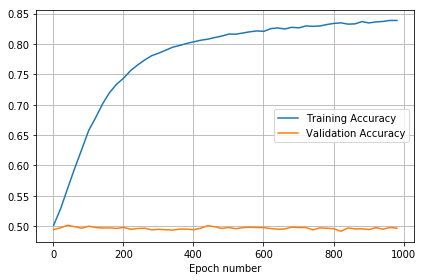

[[5004 5160]
 [4978 4858]]

Validation Avg: [ 0.4931]
Train Avg: [ 0.841625]


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]    [0]
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1]    [1]
[1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1]    [1]
[0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]    [1]
[0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1]    [1]
[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0]    [0]
[1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1]    [0]
[0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1]    [0]
[0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1]    [1]
[0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1]    [1]
[1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0]    [1]




 Overall for: 30_1000
[ 0.4931]
[ 0.841625]

OVERALL VAL: 0.493099998385
OVERALL TRAIN: 0.841624998376


Epochs: 1000  -------  Try: 0
Train on 80000 samples,

Epoch 36/1000
80000/80000 [==============================] - 11s 137us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - acc: 0.5549 - val_loss: 0.7035 - val_binary_crossentropy: 0.7035 - val_acc: 0.5037
Epoch 37/1000
80000/80000 [==============================] - 10s 131us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - acc: 0.5558 - val_loss: 0.7020 - val_binary_crossentropy: 0.7020 - val_acc: 0.5047
Epoch 38/1000
80000/80000 [==============================] - 10s 130us/step - loss: 0.6824 - binary_crossentropy: 0.6824 - acc: 0.5602 - val_loss: 0.7034 - val_binary_crossentropy: 0.7034 - val_acc: 0.5042
Epoch 39/1000
80000/80000 [==============================] - 10s 131us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5602 - val_loss: 0.7061 - val_binary_crossentropy: 0.7061 - val_acc: 0.5042
Epoch 40/1000
80000/80000 [==============================] - 10s 126us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5644 - val_loss: 0.7051 - val_binary_crossentr

Epoch 76/1000
80000/80000 [==============================] - 11s 138us/step - loss: 0.6369 - binary_crossentropy: 0.6369 - acc: 0.6358 - val_loss: 0.7544 - val_binary_crossentropy: 0.7544 - val_acc: 0.4973
Epoch 77/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6366 - binary_crossentropy: 0.6366 - acc: 0.6346 - val_loss: 0.7492 - val_binary_crossentropy: 0.7492 - val_acc: 0.4983
Epoch 78/1000
80000/80000 [==============================] - 13s 164us/step - loss: 0.6341 - binary_crossentropy: 0.6341 - acc: 0.6369 - val_loss: 0.7669 - val_binary_crossentropy: 0.7669 - val_acc: 0.4951
Epoch 79/1000
80000/80000 [==============================] - 13s 161us/step - loss: 0.6323 - binary_crossentropy: 0.6323 - acc: 0.6420 - val_loss: 0.7636 - val_binary_crossentropy: 0.7636 - val_acc: 0.5039
Epoch 80/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.6308 - binary_crossentropy: 0.6308 - acc: 0.6419 - val_loss: 0.7559 - val_binary_crossentr

Epoch 116/1000
80000/80000 [==============================] - 11s 140us/step - loss: 0.5592 - binary_crossentropy: 0.5592 - acc: 0.7096 - val_loss: 0.8609 - val_binary_crossentropy: 0.8609 - val_acc: 0.4926
Epoch 117/1000
80000/80000 [==============================] - 13s 158us/step - loss: 0.5578 - binary_crossentropy: 0.5578 - acc: 0.7128 - val_loss: 0.8532 - val_binary_crossentropy: 0.8532 - val_acc: 0.5006
Epoch 118/1000
80000/80000 [==============================] - 15s 182us/step - loss: 0.5554 - binary_crossentropy: 0.5554 - acc: 0.7141 - val_loss: 0.8636 - val_binary_crossentropy: 0.8636 - val_acc: 0.5033
Epoch 119/1000
80000/80000 [==============================] - 13s 156us/step - loss: 0.5537 - binary_crossentropy: 0.5537 - acc: 0.7153 - val_loss: 0.8592 - val_binary_crossentropy: 0.8592 - val_acc: 0.5012
Epoch 120/1000
80000/80000 [==============================] - 11s 133us/step - loss: 0.5505 - binary_crossentropy: 0.5505 - acc: 0.7180 - val_loss: 0.8612 - val_binary_cros

80000/80000 [==============================] - 10s 122us/step - loss: 0.4795 - binary_crossentropy: 0.4795 - acc: 0.7665 - val_loss: 1.0031 - val_binary_crossentropy: 1.0031 - val_acc: 0.4985
Epoch 156/1000
80000/80000 [==============================] - 11s 135us/step - loss: 0.4768 - binary_crossentropy: 0.4768 - acc: 0.7687 - val_loss: 1.0063 - val_binary_crossentropy: 1.0063 - val_acc: 0.4980
Epoch 157/1000
80000/80000 [==============================] - 12s 151us/step - loss: 0.4761 - binary_crossentropy: 0.4761 - acc: 0.7711 - val_loss: 1.0137 - val_binary_crossentropy: 1.0137 - val_acc: 0.4941
Epoch 158/1000
80000/80000 [==============================] - 13s 158us/step - loss: 0.4704 - binary_crossentropy: 0.4704 - acc: 0.7727 - val_loss: 1.0195 - val_binary_crossentropy: 1.0195 - val_acc: 0.4979
Epoch 159/1000
80000/80000 [==============================] - 12s 150us/step - loss: 0.4698 - binary_crossentropy: 0.4698 - acc: 0.7750 - val_loss: 1.0134 - val_binary_crossentropy: 1.013

Epoch 195/1000
80000/80000 [==============================] - 10s 120us/step - loss: 0.4152 - binary_crossentropy: 0.4152 - acc: 0.8071 - val_loss: 1.1578 - val_binary_crossentropy: 1.1578 - val_acc: 0.4979
Epoch 196/1000
80000/80000 [==============================] - 10s 129us/step - loss: 0.4119 - binary_crossentropy: 0.4119 - acc: 0.8088 - val_loss: 1.1689 - val_binary_crossentropy: 1.1689 - val_acc: 0.4955
Epoch 197/1000
80000/80000 [==============================] - 11s 136us/step - loss: 0.4134 - binary_crossentropy: 0.4134 - acc: 0.8078 - val_loss: 1.1455 - val_binary_crossentropy: 1.1455 - val_acc: 0.4938
Epoch 198/1000
80000/80000 [==============================] - 10s 128us/step - loss: 0.4122 - binary_crossentropy: 0.4122 - acc: 0.8070 - val_loss: 1.1731 - val_binary_crossentropy: 1.1731 - val_acc: 0.4959
Epoch 199/1000
80000/80000 [==============================] - 13s 161us/step - loss: 0.4080 - binary_crossentropy: 0.4080 - acc: 0.8119 - val_loss: 1.1626 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.3708 - binary_crossentropy: 0.3708 - acc: 0.8332 - val_loss: 1.2818 - val_binary_crossentropy: 1.2818 - val_acc: 0.4948
Epoch 235/1000
80000/80000 [==============================] - 13s 158us/step - loss: 0.3638 - binary_crossentropy: 0.3638 - acc: 0.8354 - val_loss: 1.2850 - val_binary_crossentropy: 1.2850 - val_acc: 0.4956
Epoch 236/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.3688 - binary_crossentropy: 0.3688 - acc: 0.8333 - val_loss: 1.2938 - val_binary_crossentropy: 1.2938 - val_acc: 0.4938
Epoch 237/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.3640 - binary_crossentropy: 0.3640 - acc: 0.8345 - val_loss: 1.2915 - val_binary_crossentropy: 1.2915 - val_acc: 0.4980
Epoch 238/1000
80000/80000 [==============================] - 11s 134us/step - loss: 0.3653 - binary_crossentropy: 0.3653 - acc: 0.8348 - val_loss: 1.2878 - val_binary_crossentropy: 1.287

Epoch 274/1000
80000/80000 [==============================] - 11s 136us/step - loss: 0.3346 - binary_crossentropy: 0.3346 - acc: 0.8517 - val_loss: 1.3914 - val_binary_crossentropy: 1.3914 - val_acc: 0.4963
Epoch 275/1000
80000/80000 [==============================] - 11s 136us/step - loss: 0.3314 - binary_crossentropy: 0.3314 - acc: 0.8537 - val_loss: 1.3874 - val_binary_crossentropy: 1.3874 - val_acc: 0.5001
Epoch 276/1000
80000/80000 [==============================] - 11s 136us/step - loss: 0.3373 - binary_crossentropy: 0.3373 - acc: 0.8506 - val_loss: 1.3872 - val_binary_crossentropy: 1.3872 - val_acc: 0.4956
Epoch 277/1000
80000/80000 [==============================] - 11s 136us/step - loss: 0.3330 - binary_crossentropy: 0.3330 - acc: 0.8531 - val_loss: 1.3975 - val_binary_crossentropy: 1.3975 - val_acc: 0.4968
Epoch 278/1000
80000/80000 [==============================] - 11s 137us/step - loss: 0.3325 - binary_crossentropy: 0.3325 - acc: 0.8505 - val_loss: 1.3850 - val_binary_cros

80000/80000 [==============================] - 12s 149us/step - loss: 0.3118 - binary_crossentropy: 0.3118 - acc: 0.8633 - val_loss: 1.4825 - val_binary_crossentropy: 1.4825 - val_acc: 0.4962
Epoch 314/1000
80000/80000 [==============================] - 14s 179us/step - loss: 0.3107 - binary_crossentropy: 0.3107 - acc: 0.8632 - val_loss: 1.4813 - val_binary_crossentropy: 1.4813 - val_acc: 0.4995
Epoch 315/1000
80000/80000 [==============================] - 13s 163us/step - loss: 0.3090 - binary_crossentropy: 0.3090 - acc: 0.8643 - val_loss: 1.4851 - val_binary_crossentropy: 1.4851 - val_acc: 0.5004
Epoch 316/1000
80000/80000 [==============================] - 15s 181us/step - loss: 0.3107 - binary_crossentropy: 0.3107 - acc: 0.8640 - val_loss: 1.5000 - val_binary_crossentropy: 1.5000 - val_acc: 0.4976
Epoch 317/1000
80000/80000 [==============================] - 10s 128us/step - loss: 0.3093 - binary_crossentropy: 0.3093 - acc: 0.8651 - val_loss: 1.4863 - val_binary_crossentropy: 1.486

Epoch 353/1000
80000/80000 [==============================] - 9s 112us/step - loss: 0.2924 - binary_crossentropy: 0.2924 - acc: 0.8727 - val_loss: 1.5404 - val_binary_crossentropy: 1.5404 - val_acc: 0.5008
Epoch 354/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2922 - binary_crossentropy: 0.2922 - acc: 0.8722 - val_loss: 1.5472 - val_binary_crossentropy: 1.5472 - val_acc: 0.5035
Epoch 355/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2921 - binary_crossentropy: 0.2921 - acc: 0.8731 - val_loss: 1.5640 - val_binary_crossentropy: 1.5640 - val_acc: 0.5025
Epoch 356/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2930 - binary_crossentropy: 0.2930 - acc: 0.8727 - val_loss: 1.5423 - val_binary_crossentropy: 1.5423 - val_acc: 0.5036
Epoch 357/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2888 - binary_crossentropy: 0.2888 - acc: 0.8757 - val_loss: 1.5612 - val_binary_crossent

Epoch 393/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2820 - binary_crossentropy: 0.2820 - acc: 0.8794 - val_loss: 1.5895 - val_binary_crossentropy: 1.5895 - val_acc: 0.5061
Epoch 394/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.2784 - binary_crossentropy: 0.2784 - acc: 0.8805 - val_loss: 1.6006 - val_binary_crossentropy: 1.6006 - val_acc: 0.5011
Epoch 395/1000
80000/80000 [==============================] - 11s 139us/step - loss: 0.2775 - binary_crossentropy: 0.2775 - acc: 0.8803 - val_loss: 1.6014 - val_binary_crossentropy: 1.6014 - val_acc: 0.5007
Epoch 396/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.2789 - binary_crossentropy: 0.2789 - acc: 0.8794 - val_loss: 1.6107 - val_binary_crossentropy: 1.6107 - val_acc: 0.5029
Epoch 397/1000
80000/80000 [==============================] - 14s 174us/step - loss: 0.2776 - binary_crossentropy: 0.2776 - acc: 0.8797 - val_loss: 1.6093 - val_binary_cros

80000/80000 [==============================] - 10s 123us/step - loss: 0.2627 - binary_crossentropy: 0.2627 - acc: 0.8882 - val_loss: 1.6610 - val_binary_crossentropy: 1.6610 - val_acc: 0.5010
Epoch 433/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2666 - binary_crossentropy: 0.2666 - acc: 0.8863 - val_loss: 1.6678 - val_binary_crossentropy: 1.6678 - val_acc: 0.5050
Epoch 434/1000
80000/80000 [==============================] - 10s 127us/step - loss: 0.2681 - binary_crossentropy: 0.2681 - acc: 0.8850 - val_loss: 1.6486 - val_binary_crossentropy: 1.6486 - val_acc: 0.5003
Epoch 435/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.2648 - binary_crossentropy: 0.2648 - acc: 0.8863 - val_loss: 1.6577 - val_binary_crossentropy: 1.6577 - val_acc: 0.5021
Epoch 436/1000
80000/80000 [==============================] - 10s 128us/step - loss: 0.2673 - binary_crossentropy: 0.2673 - acc: 0.8842 - val_loss: 1.6517 - val_binary_crossentropy: 1.651

Epoch 472/1000
80000/80000 [==============================] - 10s 126us/step - loss: 0.2558 - binary_crossentropy: 0.2558 - acc: 0.8913 - val_loss: 1.6964 - val_binary_crossentropy: 1.6964 - val_acc: 0.5025
Epoch 473/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2551 - binary_crossentropy: 0.2551 - acc: 0.8911 - val_loss: 1.7008 - val_binary_crossentropy: 1.7008 - val_acc: 0.5053
Epoch 474/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2561 - binary_crossentropy: 0.2561 - acc: 0.8909 - val_loss: 1.6885 - val_binary_crossentropy: 1.6885 - val_acc: 0.5042
Epoch 475/1000
80000/80000 [==============================] - 10s 125us/step - loss: 0.2545 - binary_crossentropy: 0.2545 - acc: 0.8926 - val_loss: 1.7178 - val_binary_crossentropy: 1.7178 - val_acc: 0.5033
Epoch 476/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2534 - binary_crossentropy: 0.2534 - acc: 0.8921 - val_loss: 1.7157 - val_binary_cros

80000/80000 [==============================] - 10s 120us/step - loss: 0.2506 - binary_crossentropy: 0.2506 - acc: 0.8939 - val_loss: 1.7241 - val_binary_crossentropy: 1.7241 - val_acc: 0.5058
Epoch 512/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.2476 - binary_crossentropy: 0.2476 - acc: 0.8951 - val_loss: 1.7334 - val_binary_crossentropy: 1.7334 - val_acc: 0.5042
Epoch 513/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2461 - binary_crossentropy: 0.2461 - acc: 0.8956 - val_loss: 1.7427 - val_binary_crossentropy: 1.7427 - val_acc: 0.5047
Epoch 514/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2483 - binary_crossentropy: 0.2483 - acc: 0.8946 - val_loss: 1.7335 - val_binary_crossentropy: 1.7335 - val_acc: 0.5042
Epoch 515/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2475 - binary_crossentropy: 0.2475 - acc: 0.8944 - val_loss: 1.7330 - val_binary_crossentropy: 1.733

Epoch 551/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2398 - binary_crossentropy: 0.2398 - acc: 0.8974 - val_loss: 1.7935 - val_binary_crossentropy: 1.7935 - val_acc: 0.4998
Epoch 552/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.2411 - binary_crossentropy: 0.2411 - acc: 0.8978 - val_loss: 1.7829 - val_binary_crossentropy: 1.7829 - val_acc: 0.5015
Epoch 553/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2415 - binary_crossentropy: 0.2415 - acc: 0.8979 - val_loss: 1.7861 - val_binary_crossentropy: 1.7861 - val_acc: 0.5020
Epoch 554/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2436 - binary_crossentropy: 0.2436 - acc: 0.8970 - val_loss: 1.7712 - val_binary_crossentropy: 1.7712 - val_acc: 0.5025
Epoch 555/1000
80000/80000 [==============================] - 10s 125us/step - loss: 0.2423 - binary_crossentropy: 0.2423 - acc: 0.8991 - val_loss: 1.7615 - val_binary_cros

80000/80000 [==============================] - 10s 123us/step - loss: 0.2360 - binary_crossentropy: 0.2360 - acc: 0.9022 - val_loss: 1.8032 - val_binary_crossentropy: 1.8032 - val_acc: 0.5026
Epoch 591/1000
80000/80000 [==============================] - 10s 124us/step - loss: 0.2332 - binary_crossentropy: 0.2332 - acc: 0.9013 - val_loss: 1.8069 - val_binary_crossentropy: 1.8069 - val_acc: 0.5041
Epoch 592/1000
80000/80000 [==============================] - 10s 122us/step - loss: 0.2331 - binary_crossentropy: 0.2331 - acc: 0.9016 - val_loss: 1.8057 - val_binary_crossentropy: 1.8057 - val_acc: 0.5033
Epoch 593/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2366 - binary_crossentropy: 0.2366 - acc: 0.8998 - val_loss: 1.8024 - val_binary_crossentropy: 1.8024 - val_acc: 0.5034
Epoch 594/1000
80000/80000 [==============================] - 10s 125us/step - loss: 0.2360 - binary_crossentropy: 0.2360 - acc: 0.9000 - val_loss: 1.7856 - val_binary_crossentropy: 1.785

Epoch 630/1000
80000/80000 [==============================] - 10s 125us/step - loss: 0.2293 - binary_crossentropy: 0.2293 - acc: 0.9033 - val_loss: 1.8273 - val_binary_crossentropy: 1.8273 - val_acc: 0.5037
Epoch 631/1000
80000/80000 [==============================] - 10s 123us/step - loss: 0.2310 - binary_crossentropy: 0.2310 - acc: 0.9033 - val_loss: 1.8152 - val_binary_crossentropy: 1.8152 - val_acc: 0.5034
Epoch 632/1000
80000/80000 [==============================] - 13s 159us/step - loss: 0.2296 - binary_crossentropy: 0.2296 - acc: 0.9035 - val_loss: 1.8224 - val_binary_crossentropy: 1.8224 - val_acc: 0.5005
Epoch 633/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2310 - binary_crossentropy: 0.2310 - acc: 0.9020 - val_loss: 1.8408 - val_binary_crossentropy: 1.8408 - val_acc: 0.5033
Epoch 634/1000
80000/80000 [==============================] - 11s 132us/step - loss: 0.2273 - binary_crossentropy: 0.2273 - acc: 0.9057 - val_loss: 1.8379 - val_binary_cros

80000/80000 [==============================] - 9s 117us/step - loss: 0.2238 - binary_crossentropy: 0.2238 - acc: 0.9067 - val_loss: 1.8547 - val_binary_crossentropy: 1.8547 - val_acc: 0.5033
Epoch 670/1000
80000/80000 [==============================] - 9s 117us/step - loss: 0.2259 - binary_crossentropy: 0.2259 - acc: 0.9070 - val_loss: 1.8665 - val_binary_crossentropy: 1.8665 - val_acc: 0.4989
Epoch 671/1000
80000/80000 [==============================] - 9s 116us/step - loss: 0.2232 - binary_crossentropy: 0.2232 - acc: 0.9060 - val_loss: 1.8559 - val_binary_crossentropy: 1.8559 - val_acc: 0.5074
Epoch 672/1000
80000/80000 [==============================] - 9s 116us/step - loss: 0.2217 - binary_crossentropy: 0.2217 - acc: 0.9066 - val_loss: 1.8577 - val_binary_crossentropy: 1.8577 - val_acc: 0.5058
Epoch 673/1000
80000/80000 [==============================] - 9s 117us/step - loss: 0.2248 - binary_crossentropy: 0.2248 - acc: 0.9058 - val_loss: 1.8590 - val_binary_crossentropy: 1.8590 - v

Epoch 709/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2191 - binary_crossentropy: 0.2191 - acc: 0.9090 - val_loss: 1.8864 - val_binary_crossentropy: 1.8864 - val_acc: 0.4981
Epoch 710/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2223 - binary_crossentropy: 0.2223 - acc: 0.9075 - val_loss: 1.8714 - val_binary_crossentropy: 1.8714 - val_acc: 0.5001
Epoch 711/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2231 - binary_crossentropy: 0.2231 - acc: 0.9073 - val_loss: 1.8767 - val_binary_crossentropy: 1.8767 - val_acc: 0.5023
Epoch 712/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2192 - binary_crossentropy: 0.2192 - acc: 0.9076 - val_loss: 1.8751 - val_binary_crossentropy: 1.8751 - val_acc: 0.5011
Epoch 713/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2215 - binary_crossentropy: 0.2215 - acc: 0.9078 - val_loss: 1.8694 - val_binary_crossentr

Epoch 749/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2207 - binary_crossentropy: 0.2207 - acc: 0.9081 - val_loss: 1.8822 - val_binary_crossentropy: 1.8822 - val_acc: 0.5043
Epoch 750/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2162 - binary_crossentropy: 0.2162 - acc: 0.9111 - val_loss: 1.8954 - val_binary_crossentropy: 1.8954 - val_acc: 0.5025
Epoch 751/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2218 - binary_crossentropy: 0.2218 - acc: 0.9085 - val_loss: 1.8934 - val_binary_crossentropy: 1.8934 - val_acc: 0.5020
Epoch 752/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2151 - binary_crossentropy: 0.2151 - acc: 0.9103 - val_loss: 1.8987 - val_binary_crossentropy: 1.8987 - val_acc: 0.5013
Epoch 753/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2151 - binary_crossentropy: 0.2151 - acc: 0.9107 - val_loss: 1.8971 - val_binary_crossentr

Epoch 789/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2124 - binary_crossentropy: 0.2124 - acc: 0.9118 - val_loss: 1.9316 - val_binary_crossentropy: 1.9316 - val_acc: 0.4995
Epoch 790/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2150 - binary_crossentropy: 0.2150 - acc: 0.9092 - val_loss: 1.9329 - val_binary_crossentropy: 1.9329 - val_acc: 0.4971
Epoch 791/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2127 - binary_crossentropy: 0.2127 - acc: 0.9119 - val_loss: 1.9208 - val_binary_crossentropy: 1.9208 - val_acc: 0.5019
Epoch 792/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2113 - binary_crossentropy: 0.2113 - acc: 0.9112 - val_loss: 1.9234 - val_binary_crossentropy: 1.9234 - val_acc: 0.5000
Epoch 793/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2120 - binary_crossentropy: 0.2120 - acc: 0.9122 - val_loss: 1.9278 - val_binary_crossentr

Epoch 829/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2135 - binary_crossentropy: 0.2135 - acc: 0.9113 - val_loss: 1.9396 - val_binary_crossentropy: 1.9396 - val_acc: 0.4999
Epoch 830/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2090 - binary_crossentropy: 0.2090 - acc: 0.9139 - val_loss: 1.9468 - val_binary_crossentropy: 1.9468 - val_acc: 0.5008
Epoch 831/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2083 - binary_crossentropy: 0.2083 - acc: 0.9137 - val_loss: 1.9489 - val_binary_crossentropy: 1.9489 - val_acc: 0.5004
Epoch 832/1000
80000/80000 [==============================] - 9s 116us/step - loss: 0.2083 - binary_crossentropy: 0.2083 - acc: 0.9137 - val_loss: 1.9561 - val_binary_crossentropy: 1.9561 - val_acc: 0.5007
Epoch 833/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2105 - binary_crossentropy: 0.2105 - acc: 0.9130 - val_loss: 1.9332 - val_binary_crossentr

Epoch 869/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2078 - binary_crossentropy: 0.2078 - acc: 0.9146 - val_loss: 1.9463 - val_binary_crossentropy: 1.9463 - val_acc: 0.4997
Epoch 870/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2068 - binary_crossentropy: 0.2068 - acc: 0.9151 - val_loss: 1.9473 - val_binary_crossentropy: 1.9473 - val_acc: 0.5030
Epoch 871/1000
80000/80000 [==============================] - 9s 116us/step - loss: 0.2050 - binary_crossentropy: 0.2050 - acc: 0.9154 - val_loss: 1.9391 - val_binary_crossentropy: 1.9391 - val_acc: 0.5030
Epoch 872/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2084 - binary_crossentropy: 0.2084 - acc: 0.9131 - val_loss: 1.9595 - val_binary_crossentropy: 1.9595 - val_acc: 0.5016
Epoch 873/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2077 - binary_crossentropy: 0.2077 - acc: 0.9138 - val_loss: 1.9487 - val_binary_crossentr

Epoch 909/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2029 - binary_crossentropy: 0.2029 - acc: 0.9164 - val_loss: 1.9620 - val_binary_crossentropy: 1.9620 - val_acc: 0.5017
Epoch 910/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2069 - binary_crossentropy: 0.2069 - acc: 0.9148 - val_loss: 1.9560 - val_binary_crossentropy: 1.9560 - val_acc: 0.5015
Epoch 911/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2014 - binary_crossentropy: 0.2014 - acc: 0.9165 - val_loss: 1.9641 - val_binary_crossentropy: 1.9641 - val_acc: 0.4989
Epoch 912/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2054 - binary_crossentropy: 0.2054 - acc: 0.9154 - val_loss: 1.9528 - val_binary_crossentropy: 1.9528 - val_acc: 0.5022
Epoch 913/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2042 - binary_crossentropy: 0.2042 - acc: 0.9155 - val_loss: 1.9505 - val_binary_crossentr

Epoch 949/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2006 - binary_crossentropy: 0.2006 - acc: 0.9169 - val_loss: 1.9759 - val_binary_crossentropy: 1.9759 - val_acc: 0.5028
Epoch 950/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2016 - binary_crossentropy: 0.2016 - acc: 0.9172 - val_loss: 1.9694 - val_binary_crossentropy: 1.9694 - val_acc: 0.5050
Epoch 951/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2058 - binary_crossentropy: 0.2058 - acc: 0.9159 - val_loss: 1.9601 - val_binary_crossentropy: 1.9601 - val_acc: 0.5014
Epoch 952/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.2015 - binary_crossentropy: 0.2015 - acc: 0.9169 - val_loss: 1.9797 - val_binary_crossentropy: 1.9797 - val_acc: 0.5012
Epoch 953/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2018 - binary_crossentropy: 0.2018 - acc: 0.9168 - val_loss: 1.9619 - val_binary_crossentr

Epoch 989/1000
80000/80000 [==============================] - 9s 115us/step - loss: 0.2007 - binary_crossentropy: 0.2007 - acc: 0.9174 - val_loss: 1.9875 - val_binary_crossentropy: 1.9875 - val_acc: 0.4990
Epoch 990/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.1972 - binary_crossentropy: 0.1972 - acc: 0.9197 - val_loss: 2.0056 - val_binary_crossentropy: 2.0056 - val_acc: 0.5005
Epoch 991/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.1988 - binary_crossentropy: 0.1988 - acc: 0.9180 - val_loss: 1.9893 - val_binary_crossentropy: 1.9893 - val_acc: 0.5027
Epoch 992/1000
80000/80000 [==============================] - 9s 113us/step - loss: 0.1988 - binary_crossentropy: 0.1988 - acc: 0.9192 - val_loss: 2.0060 - val_binary_crossentropy: 2.0060 - val_acc: 0.4991
Epoch 993/1000
80000/80000 [==============================] - 9s 114us/step - loss: 0.2020 - binary_crossentropy: 0.2020 - acc: 0.9170 - val_loss: 1.9974 - val_binary_crossentr

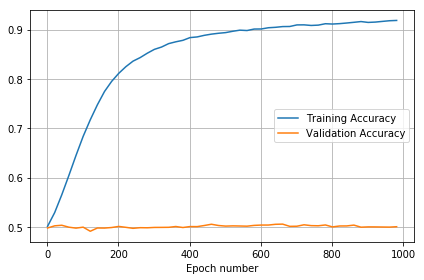

[[5185 5184]
 [4797 4834]]

Validation Avg: [ 0.50095]
Train Avg: [ 0.9179875]


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]    [0]
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1]    [1]
[0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]    [1]
[0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0]    [1]
[1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0]    [0]
[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0]    [0]
[0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1]    [1]
[1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0]    [1]
[1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1]    [1]
[0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0]    [0]
[0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0]    [1]




 Overall for: 30_1000
[ 0.50095]
[ 0.9179875]

OVERALL VAL: 0.500949997306
OVERALL TRAIN: 0.917987502739


Epochs: 1000  -------  Try: 0
Train on 80000 samp

Epoch 36/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5488 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_acc: 0.5020
Epoch 37/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - acc: 0.5518 - val_loss: 0.7040 - val_binary_crossentropy: 0.7040 - val_acc: 0.4984
Epoch 38/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6850 - binary_crossentropy: 0.6850 - acc: 0.5519 - val_loss: 0.7048 - val_binary_crossentropy: 0.7048 - val_acc: 0.5016
Epoch 39/1000
80000/80000 [==============================] - 11s 142us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5550 - val_loss: 0.7050 - val_binary_crossentropy: 0.7050 - val_acc: 0.4981
Epoch 40/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - acc: 0.5561 - val_loss: 0.7019 - val_binary_crossentr

Epoch 76/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.6538 - binary_crossentropy: 0.6538 - acc: 0.6128 - val_loss: 0.7372 - val_binary_crossentropy: 0.7372 - val_acc: 0.4991
Epoch 77/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6530 - binary_crossentropy: 0.6530 - acc: 0.6136 - val_loss: 0.7335 - val_binary_crossentropy: 0.7335 - val_acc: 0.4989
Epoch 78/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6520 - binary_crossentropy: 0.6520 - acc: 0.6145 - val_loss: 0.7344 - val_binary_crossentropy: 0.7344 - val_acc: 0.5031
Epoch 79/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6504 - binary_crossentropy: 0.6504 - acc: 0.6162 - val_loss: 0.7403 - val_binary_crossentropy: 0.7403 - val_acc: 0.4984
Epoch 80/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.6493 - binary_crossentropy: 0.6493 - acc: 0.6182 - val_loss: 0.7439 - val_binary_crossentr

Epoch 116/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5900 - binary_crossentropy: 0.5900 - acc: 0.6842 - val_loss: 0.8064 - val_binary_crossentropy: 0.8064 - val_acc: 0.4980
Epoch 117/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5910 - binary_crossentropy: 0.5910 - acc: 0.6832 - val_loss: 0.7997 - val_binary_crossentropy: 0.7997 - val_acc: 0.4974
Epoch 118/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5868 - binary_crossentropy: 0.5868 - acc: 0.6873 - val_loss: 0.8199 - val_binary_crossentropy: 0.8199 - val_acc: 0.4952
Epoch 119/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5871 - binary_crossentropy: 0.5871 - acc: 0.6871 - val_loss: 0.8249 - val_binary_crossentropy: 0.8249 - val_acc: 0.4981
Epoch 120/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5833 - binary_crossentropy: 0.5833 - acc: 0.6913 - val_loss: 0.8279 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.5062 - binary_crossentropy: 0.5062 - acc: 0.7490 - val_loss: 0.9468 - val_binary_crossentropy: 0.9468 - val_acc: 0.5021
Epoch 156/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5061 - binary_crossentropy: 0.5061 - acc: 0.7510 - val_loss: 0.9368 - val_binary_crossentropy: 0.9368 - val_acc: 0.4970
Epoch 157/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.5036 - binary_crossentropy: 0.5036 - acc: 0.7524 - val_loss: 0.9332 - val_binary_crossentropy: 0.9332 - val_acc: 0.5039
Epoch 158/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.5009 - binary_crossentropy: 0.5009 - acc: 0.7536 - val_loss: 0.9432 - val_binary_crossentropy: 0.9432 - val_acc: 0.4993
Epoch 159/1000
80000/80000 [==============================] - 12s 147us/step - loss: 0.4987 - binary_crossentropy: 0.4987 - acc: 0.7531 - val_loss: 0.9376 - val_binary_crossentropy: 0.937

Epoch 195/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.4179 - binary_crossentropy: 0.4179 - acc: 0.8063 - val_loss: 1.1137 - val_binary_crossentropy: 1.1137 - val_acc: 0.5031
Epoch 196/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.4181 - binary_crossentropy: 0.4181 - acc: 0.8067 - val_loss: 1.1443 - val_binary_crossentropy: 1.1443 - val_acc: 0.5029
Epoch 197/1000
80000/80000 [==============================] - 11s 142us/step - loss: 0.4135 - binary_crossentropy: 0.4135 - acc: 0.8072 - val_loss: 1.1333 - val_binary_crossentropy: 1.1333 - val_acc: 0.5006
Epoch 198/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.4132 - binary_crossentropy: 0.4132 - acc: 0.8075 - val_loss: 1.1292 - val_binary_crossentropy: 1.1292 - val_acc: 0.4969
Epoch 199/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.4137 - binary_crossentropy: 0.4137 - acc: 0.8092 - val_loss: 1.1239 - val_binary_cros

80000/80000 [==============================] - 11s 142us/step - loss: 0.3519 - binary_crossentropy: 0.3519 - acc: 0.8414 - val_loss: 1.3080 - val_binary_crossentropy: 1.3080 - val_acc: 0.4997
Epoch 235/1000
80000/80000 [==============================] - 11s 142us/step - loss: 0.3503 - binary_crossentropy: 0.3503 - acc: 0.8435 - val_loss: 1.3186 - val_binary_crossentropy: 1.3186 - val_acc: 0.5018
Epoch 236/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.3505 - binary_crossentropy: 0.3505 - acc: 0.8415 - val_loss: 1.3061 - val_binary_crossentropy: 1.3061 - val_acc: 0.4972
Epoch 237/1000
80000/80000 [==============================] - 12s 148us/step - loss: 0.3479 - binary_crossentropy: 0.3479 - acc: 0.8433 - val_loss: 1.3477 - val_binary_crossentropy: 1.3477 - val_acc: 0.4972
Epoch 238/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.3459 - binary_crossentropy: 0.3459 - acc: 0.8455 - val_loss: 1.3231 - val_binary_crossentropy: 1.323

Epoch 274/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.3003 - binary_crossentropy: 0.3003 - acc: 0.8678 - val_loss: 1.5112 - val_binary_crossentropy: 1.5112 - val_acc: 0.4968
Epoch 275/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2995 - binary_crossentropy: 0.2995 - acc: 0.8695 - val_loss: 1.5072 - val_binary_crossentropy: 1.5072 - val_acc: 0.4972
Epoch 276/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2940 - binary_crossentropy: 0.2940 - acc: 0.8727 - val_loss: 1.5171 - val_binary_crossentropy: 1.5171 - val_acc: 0.4941
Epoch 277/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2941 - binary_crossentropy: 0.2941 - acc: 0.8725 - val_loss: 1.5284 - val_binary_crossentropy: 1.5284 - val_acc: 0.4961
Epoch 278/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2952 - binary_crossentropy: 0.2952 - acc: 0.8724 - val_loss: 1.5357 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.2627 - binary_crossentropy: 0.2627 - acc: 0.8872 - val_loss: 1.6896 - val_binary_crossentropy: 1.6896 - val_acc: 0.4966
Epoch 314/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2614 - binary_crossentropy: 0.2614 - acc: 0.8894 - val_loss: 1.6650 - val_binary_crossentropy: 1.6650 - val_acc: 0.4926
Epoch 315/1000
80000/80000 [==============================] - 12s 147us/step - loss: 0.2621 - binary_crossentropy: 0.2621 - acc: 0.8878 - val_loss: 1.6517 - val_binary_crossentropy: 1.6517 - val_acc: 0.4979
Epoch 316/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2588 - binary_crossentropy: 0.2588 - acc: 0.8905 - val_loss: 1.6626 - val_binary_crossentropy: 1.6626 - val_acc: 0.4993
Epoch 317/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2569 - binary_crossentropy: 0.2569 - acc: 0.8907 - val_loss: 1.6905 - val_binary_crossentropy: 1.690

Epoch 353/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2341 - binary_crossentropy: 0.2341 - acc: 0.9012 - val_loss: 1.7897 - val_binary_crossentropy: 1.7897 - val_acc: 0.4939
Epoch 354/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.2320 - binary_crossentropy: 0.2320 - acc: 0.9032 - val_loss: 1.8195 - val_binary_crossentropy: 1.8195 - val_acc: 0.4967
Epoch 355/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2327 - binary_crossentropy: 0.2327 - acc: 0.9034 - val_loss: 1.8114 - val_binary_crossentropy: 1.8114 - val_acc: 0.4974
Epoch 356/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2320 - binary_crossentropy: 0.2320 - acc: 0.9034 - val_loss: 1.8120 - val_binary_crossentropy: 1.8120 - val_acc: 0.4935
Epoch 357/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2305 - binary_crossentropy: 0.2305 - acc: 0.9032 - val_loss: 1.8240 - val_binary_cros

80000/80000 [==============================] - 12s 145us/step - loss: 0.2167 - binary_crossentropy: 0.2167 - acc: 0.9106 - val_loss: 1.9104 - val_binary_crossentropy: 1.9104 - val_acc: 0.4949
Epoch 393/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2142 - binary_crossentropy: 0.2142 - acc: 0.9103 - val_loss: 1.9185 - val_binary_crossentropy: 1.9185 - val_acc: 0.4960
Epoch 394/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2118 - binary_crossentropy: 0.2118 - acc: 0.9117 - val_loss: 1.9339 - val_binary_crossentropy: 1.9339 - val_acc: 0.4963
Epoch 395/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.2100 - binary_crossentropy: 0.2100 - acc: 0.9126 - val_loss: 1.9306 - val_binary_crossentropy: 1.9306 - val_acc: 0.4951
Epoch 396/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.2108 - binary_crossentropy: 0.2108 - acc: 0.9132 - val_loss: 1.9573 - val_binary_crossentropy: 1.957

Epoch 432/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1976 - binary_crossentropy: 0.1976 - acc: 0.9195 - val_loss: 2.0106 - val_binary_crossentropy: 2.0106 - val_acc: 0.4947
Epoch 433/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1981 - binary_crossentropy: 0.1981 - acc: 0.9192 - val_loss: 2.0335 - val_binary_crossentropy: 2.0335 - val_acc: 0.4958
Epoch 434/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1983 - binary_crossentropy: 0.1983 - acc: 0.9193 - val_loss: 1.9859 - val_binary_crossentropy: 1.9859 - val_acc: 0.4955
Epoch 435/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1985 - binary_crossentropy: 0.1985 - acc: 0.9191 - val_loss: 2.0106 - val_binary_crossentropy: 2.0106 - val_acc: 0.4946
Epoch 436/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1930 - binary_crossentropy: 0.1930 - acc: 0.9216 - val_loss: 2.0270 - val_binary_cros

80000/80000 [==============================] - 12s 144us/step - loss: 0.1836 - binary_crossentropy: 0.1836 - acc: 0.9253 - val_loss: 2.0905 - val_binary_crossentropy: 2.0905 - val_acc: 0.4953
Epoch 472/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1859 - binary_crossentropy: 0.1859 - acc: 0.9244 - val_loss: 2.0853 - val_binary_crossentropy: 2.0853 - val_acc: 0.4915
Epoch 473/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1875 - binary_crossentropy: 0.1875 - acc: 0.9228 - val_loss: 2.0644 - val_binary_crossentropy: 2.0644 - val_acc: 0.4944
Epoch 474/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1870 - binary_crossentropy: 0.1870 - acc: 0.9234 - val_loss: 2.0708 - val_binary_crossentropy: 2.0708 - val_acc: 0.4942
Epoch 475/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1849 - binary_crossentropy: 0.1849 - acc: 0.9252 - val_loss: 2.0982 - val_binary_crossentropy: 2.098

Epoch 511/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1738 - binary_crossentropy: 0.1738 - acc: 0.9300 - val_loss: 2.1515 - val_binary_crossentropy: 2.1515 - val_acc: 0.4920
Epoch 512/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1732 - binary_crossentropy: 0.1732 - acc: 0.9309 - val_loss: 2.1689 - val_binary_crossentropy: 2.1689 - val_acc: 0.4958
Epoch 513/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1743 - binary_crossentropy: 0.1743 - acc: 0.9296 - val_loss: 2.1608 - val_binary_crossentropy: 2.1608 - val_acc: 0.4949
Epoch 514/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1703 - binary_crossentropy: 0.1703 - acc: 0.9317 - val_loss: 2.1672 - val_binary_crossentropy: 2.1672 - val_acc: 0.4945
Epoch 515/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1724 - binary_crossentropy: 0.1724 - acc: 0.9300 - val_loss: 2.1829 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.1614 - binary_crossentropy: 0.1614 - acc: 0.9360 - val_loss: 2.2485 - val_binary_crossentropy: 2.2485 - val_acc: 0.4935
Epoch 551/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.1637 - binary_crossentropy: 0.1637 - acc: 0.9341 - val_loss: 2.2612 - val_binary_crossentropy: 2.2612 - val_acc: 0.4915
Epoch 552/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1667 - binary_crossentropy: 0.1667 - acc: 0.9334 - val_loss: 2.2257 - val_binary_crossentropy: 2.2257 - val_acc: 0.4921
Epoch 553/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1646 - binary_crossentropy: 0.1646 - acc: 0.9342 - val_loss: 2.2202 - val_binary_crossentropy: 2.2202 - val_acc: 0.4970
Epoch 554/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1632 - binary_crossentropy: 0.1632 - acc: 0.9343 - val_loss: 2.2297 - val_binary_crossentropy: 2.229

Epoch 590/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1590 - binary_crossentropy: 0.1590 - acc: 0.9365 - val_loss: 2.2912 - val_binary_crossentropy: 2.2912 - val_acc: 0.4949
Epoch 591/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1608 - binary_crossentropy: 0.1608 - acc: 0.9348 - val_loss: 2.2871 - val_binary_crossentropy: 2.2871 - val_acc: 0.4942
Epoch 592/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1586 - binary_crossentropy: 0.1586 - acc: 0.9370 - val_loss: 2.2797 - val_binary_crossentropy: 2.2797 - val_acc: 0.4957
Epoch 593/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.1558 - binary_crossentropy: 0.1558 - acc: 0.9377 - val_loss: 2.3073 - val_binary_crossentropy: 2.3073 - val_acc: 0.4899
Epoch 594/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1555 - binary_crossentropy: 0.1555 - acc: 0.9383 - val_loss: 2.2899 - val_binary_cros

80000/80000 [==============================] - 11s 142us/step - loss: 0.1550 - binary_crossentropy: 0.1550 - acc: 0.9376 - val_loss: 2.3573 - val_binary_crossentropy: 2.3573 - val_acc: 0.4904
Epoch 630/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1541 - binary_crossentropy: 0.1541 - acc: 0.9390 - val_loss: 2.3135 - val_binary_crossentropy: 2.3135 - val_acc: 0.4933
Epoch 631/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1525 - binary_crossentropy: 0.1525 - acc: 0.9400 - val_loss: 2.3211 - val_binary_crossentropy: 2.3211 - val_acc: 0.4975
Epoch 632/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1514 - binary_crossentropy: 0.1514 - acc: 0.9399 - val_loss: 2.3485 - val_binary_crossentropy: 2.3485 - val_acc: 0.4961
Epoch 633/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1525 - binary_crossentropy: 0.1525 - acc: 0.9400 - val_loss: 2.3212 - val_binary_crossentropy: 2.321

Epoch 669/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1468 - binary_crossentropy: 0.1468 - acc: 0.9423 - val_loss: 2.3804 - val_binary_crossentropy: 2.3804 - val_acc: 0.4913
Epoch 670/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1462 - binary_crossentropy: 0.1462 - acc: 0.9411 - val_loss: 2.3765 - val_binary_crossentropy: 2.3765 - val_acc: 0.4917
Epoch 671/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1476 - binary_crossentropy: 0.1476 - acc: 0.9404 - val_loss: 2.3768 - val_binary_crossentropy: 2.3768 - val_acc: 0.4917
Epoch 672/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1472 - binary_crossentropy: 0.1472 - acc: 0.9423 - val_loss: 2.3557 - val_binary_crossentropy: 2.3557 - val_acc: 0.4933
Epoch 673/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1456 - binary_crossentropy: 0.1456 - acc: 0.9421 - val_loss: 2.3686 - val_binary_cros

80000/80000 [==============================] - 11s 144us/step - loss: 0.1387 - binary_crossentropy: 0.1387 - acc: 0.9459 - val_loss: 2.3926 - val_binary_crossentropy: 2.3926 - val_acc: 0.4943
Epoch 709/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1426 - binary_crossentropy: 0.1426 - acc: 0.9437 - val_loss: 2.3966 - val_binary_crossentropy: 2.3966 - val_acc: 0.4942
Epoch 710/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1408 - binary_crossentropy: 0.1408 - acc: 0.9453 - val_loss: 2.4363 - val_binary_crossentropy: 2.4363 - val_acc: 0.4913
Epoch 711/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1410 - binary_crossentropy: 0.1410 - acc: 0.9438 - val_loss: 2.4196 - val_binary_crossentropy: 2.4196 - val_acc: 0.4924
Epoch 712/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1374 - binary_crossentropy: 0.1374 - acc: 0.9460 - val_loss: 2.4116 - val_binary_crossentropy: 2.411

80000/80000 [==============================] - 12s 144us/step - loss: 0.1373 - binary_crossentropy: 0.1373 - acc: 0.9457 - val_loss: 2.4402 - val_binary_crossentropy: 2.4402 - val_acc: 0.4908
Epoch 748/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.1387 - binary_crossentropy: 0.1387 - acc: 0.9453 - val_loss: 2.4656 - val_binary_crossentropy: 2.4656 - val_acc: 0.4895
Epoch 749/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1351 - binary_crossentropy: 0.1351 - acc: 0.9470 - val_loss: 2.4435 - val_binary_crossentropy: 2.4435 - val_acc: 0.4929
Epoch 750/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1337 - binary_crossentropy: 0.1337 - acc: 0.9472 - val_loss: 2.4686 - val_binary_crossentropy: 2.4686 - val_acc: 0.4904
Epoch 751/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1339 - binary_crossentropy: 0.1339 - acc: 0.9469 - val_loss: 2.4634 - val_binary_crossentropy: 2.463

Epoch 787/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1297 - binary_crossentropy: 0.1297 - acc: 0.9487 - val_loss: 2.5093 - val_binary_crossentropy: 2.5093 - val_acc: 0.4931
Epoch 788/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1309 - binary_crossentropy: 0.1309 - acc: 0.9487 - val_loss: 2.5087 - val_binary_crossentropy: 2.5087 - val_acc: 0.4942
Epoch 789/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.1310 - binary_crossentropy: 0.1310 - acc: 0.9487 - val_loss: 2.5315 - val_binary_crossentropy: 2.5315 - val_acc: 0.4930
Epoch 790/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.1329 - binary_crossentropy: 0.1329 - acc: 0.9478 - val_loss: 2.5117 - val_binary_crossentropy: 2.5117 - val_acc: 0.4966
Epoch 791/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1338 - binary_crossentropy: 0.1338 - acc: 0.9477 - val_loss: 2.4974 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.1314 - binary_crossentropy: 0.1314 - acc: 0.9487 - val_loss: 2.5258 - val_binary_crossentropy: 2.5258 - val_acc: 0.4928
Epoch 827/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1275 - binary_crossentropy: 0.1275 - acc: 0.9491 - val_loss: 2.5261 - val_binary_crossentropy: 2.5261 - val_acc: 0.4901
Epoch 828/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1292 - binary_crossentropy: 0.1292 - acc: 0.9490 - val_loss: 2.5235 - val_binary_crossentropy: 2.5235 - val_acc: 0.4938
Epoch 829/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1275 - binary_crossentropy: 0.1275 - acc: 0.9496 - val_loss: 2.5442 - val_binary_crossentropy: 2.5442 - val_acc: 0.4944
Epoch 830/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1268 - binary_crossentropy: 0.1268 - acc: 0.9509 - val_loss: 2.5230 - val_binary_crossentropy: 2.523

Epoch 866/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1304 - binary_crossentropy: 0.1304 - acc: 0.9488 - val_loss: 2.5379 - val_binary_crossentropy: 2.5379 - val_acc: 0.4917
Epoch 867/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1271 - binary_crossentropy: 0.1271 - acc: 0.9494 - val_loss: 2.5282 - val_binary_crossentropy: 2.5282 - val_acc: 0.4934
Epoch 868/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1243 - binary_crossentropy: 0.1243 - acc: 0.9514 - val_loss: 2.5351 - val_binary_crossentropy: 2.5351 - val_acc: 0.4942
Epoch 869/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1214 - binary_crossentropy: 0.1214 - acc: 0.9535 - val_loss: 2.5364 - val_binary_crossentropy: 2.5364 - val_acc: 0.4931
Epoch 870/1000
80000/80000 [==============================] - 11s 144us/step - loss: 0.1261 - binary_crossentropy: 0.1261 - acc: 0.9505 - val_loss: 2.5465 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.1209 - binary_crossentropy: 0.1209 - acc: 0.9524 - val_loss: 2.5659 - val_binary_crossentropy: 2.5659 - val_acc: 0.4924
Epoch 906/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1217 - binary_crossentropy: 0.1217 - acc: 0.9528 - val_loss: 2.5933 - val_binary_crossentropy: 2.5933 - val_acc: 0.4929
Epoch 907/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1236 - binary_crossentropy: 0.1236 - acc: 0.9518 - val_loss: 2.5841 - val_binary_crossentropy: 2.5841 - val_acc: 0.4938
Epoch 908/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1233 - binary_crossentropy: 0.1233 - acc: 0.9517 - val_loss: 2.5549 - val_binary_crossentropy: 2.5549 - val_acc: 0.4962
Epoch 909/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1222 - binary_crossentropy: 0.1222 - acc: 0.9517 - val_loss: 2.5732 - val_binary_crossentropy: 2.573

Epoch 945/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1178 - binary_crossentropy: 0.1178 - acc: 0.9545 - val_loss: 2.6182 - val_binary_crossentropy: 2.6182 - val_acc: 0.4947
Epoch 946/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1196 - binary_crossentropy: 0.1196 - acc: 0.9536 - val_loss: 2.5892 - val_binary_crossentropy: 2.5892 - val_acc: 0.4965
Epoch 947/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1199 - binary_crossentropy: 0.1199 - acc: 0.9538 - val_loss: 2.5925 - val_binary_crossentropy: 2.5925 - val_acc: 0.4943
Epoch 948/1000
80000/80000 [==============================] - 12s 144us/step - loss: 0.1203 - binary_crossentropy: 0.1203 - acc: 0.9529 - val_loss: 2.5965 - val_binary_crossentropy: 2.5965 - val_acc: 0.4937
Epoch 949/1000
80000/80000 [==============================] - 12s 145us/step - loss: 0.1182 - binary_crossentropy: 0.1182 - acc: 0.9543 - val_loss: 2.6204 - val_binary_cros

80000/80000 [==============================] - 11s 143us/step - loss: 0.1193 - binary_crossentropy: 0.1193 - acc: 0.9539 - val_loss: 2.5964 - val_binary_crossentropy: 2.5964 - val_acc: 0.4931
Epoch 985/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1162 - binary_crossentropy: 0.1162 - acc: 0.9555 - val_loss: 2.6109 - val_binary_crossentropy: 2.6109 - val_acc: 0.4960
Epoch 986/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.1156 - binary_crossentropy: 0.1156 - acc: 0.9556 - val_loss: 2.6315 - val_binary_crossentropy: 2.6315 - val_acc: 0.4931
Epoch 987/1000
80000/80000 [==============================] - 11s 143us/step - loss: 0.1161 - binary_crossentropy: 0.1161 - acc: 0.9553 - val_loss: 2.6265 - val_binary_crossentropy: 2.6265 - val_acc: 0.4947
Epoch 988/1000
80000/80000 [==============================] - 12s 146us/step - loss: 0.1181 - binary_crossentropy: 0.1181 - acc: 0.9548 - val_loss: 2.6340 - val_binary_crossentropy: 2.634

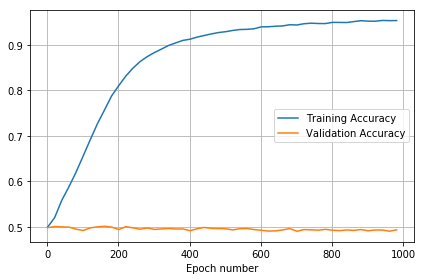

[[4915 5041]
 [5067 4977]]

Validation Avg: [ 0.4946]
Train Avg: [ 0.954575]


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]    [0]
[0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]    [1]
[0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0]    [1]
[0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]    [1]
[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1]    [0]
[1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1]    [0]
[0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1]    [0]
[0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1]    [1]
[0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1]    [1]
[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0]    [1]
[0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]    [0]




 Overall for: 30_1000
[ 0.4946]
[ 0.954575]

OVERALL VAL: 0.494599996209
OVERALL TRAIN: 0.954575003088




In [2]:
test_size = 0.2
epochs = [1000]
b_size = 100
tries = 1
depth = 5
exp = 'grid_30'


histories = np.array([])

X, Y = import_data()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

width = [len(X_train[0]), 2*len(X_train[0]), 3*len(X_train[0]), 4*len(X_train[0]), 5*len(X_train[0])]

print("\nTraining examples: " +  str(X_train.shape[0]))
print("Test examples: " +  str(X_test.shape[0]))

for d in range(4,depth):
    for w in width:
        for ep in epochs:
            avg_val = np.array([])
            avg_train = np.array([])
            for t in range(tries):
                print("Epochs: " + str(ep) + '  -------  Try: ' + str(t))
                classifier = create_dense_model(len(X_train[0]),w, d+1)
                #classifier.summary()

                history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=ep, batch_size=b_size, verbose=1)
                result = classifier.evaluate(X_test, Y_test, batch_size=b_size)

                avg_val = np.append(avg_val, result[2])
                avg_train = np.append(avg_train, history.history['acc'][-1])
                histories = np.append(histories, history)

                val_acc = history.history['val_acc']
                train_acc = history.history['acc']

                with open(exp + '/' + str(d) + '/' + 'acc_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(w) +'.txt', "w") as file:
                    file.write('val_acc  ' + str(val_acc))
                    file.write('\ntrain_acc  ' + str(train_acc))

                fig, ax = draw_figure([train_acc], 'Training Accuracy')
                fig, ax = draw_figure([val_acc], 'Validation Accuracy', fig, ax)

                ax.grid('on')
                fig.tight_layout() 
                fig.savefig(exp + '/' + str(d) + '/' +'graph_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(w) + '.pdf')
                plt.show() 



                print(confusion_matrix(classifier.predict(X_test)>0.5, Y_test))

                print("\nValidation Avg: " + str(avg_val))
                print("Train Avg: " + str(avg_train))
                print("\n")

                c = 0
                classifications = (classifier.predict(X_test) > 0.5 ) == Y_test
                for i, flag in enumerate(classifications):
                    if(flag == False and c<=10):
                        print(str(X_test[i]) + "    " + str(Y_test[i]))
                        c += 1

                c = 0
                with open(exp + '/' + str(d) + '/' + 'data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(w) + '.txt', "w") as file:
                    file.write(str(confusion_matrix(classifier.predict(X_test)>0.5, Y_test)))

                    file.write("\nValidation Avg: " + str(np.average(avg_val)))
                    file.write("\nTrain Avg: " + str(np.average(avg_train)))
                    file.write("\n\n")

                    for i, flag in enumerate(classifications):
                        if(flag == False and c<=10):
                            file.write('\n' + str(X_test[i]) + "    " + str(Y_test[i]))
                            c += 1


                print("\n\n")
            print("\n Overall for: " + str(len(X_train[0])) + '_' + str(ep))
            print(avg_val)
            print(avg_train)
            print("\nOVERALL VAL: " + str(np.average(avg_val)))
            print("OVERALL TRAIN: " + str(np.average(avg_train)))
            print("\n")

#         with open(exp + '/data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(d) + '.txt', "w") as file:
#             file.write(str(avg_val))
#             file.write("\n" + str(avg_train))
#             file.write("\n\nOVERALL VAL: " + str(np.average(avg_val)))
#             file.write("\nOVERALL TRAIN: " + str(np.average(avg_train)))

In [3]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.pdf', show_shapes=True, show_layer_names=False)



In [3]:
for d in range(4,5):
    print(d)

4
